### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
import sklearn
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error

warnings.filterwarnings('ignore')
%matplotlib inline

### Reading and Understanding data

In [3]:
# reading the dataset
houseDF = pd.read_csv("train.csv")
houseDF.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
print("Shape of the dataset is : ",houseDF.shape)

Shape of the dataset is :  (1460, 81)


In [5]:
houseDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Checking for Null values

In [6]:
print(houseDF.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [7]:
# There are null values present 

In [8]:
houseDF.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
print("Null values in entire column : ")
houseDF.isnull().all(axis=0).sum()

Null values in entire column : 


0

In [10]:
houseDF.isnull().sum()[(houseDF.isnull().sum()>0)]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [11]:
round(100*houseDF.isnull().sum()[(houseDF.isnull().sum()>0)]/len(houseDF), 2)

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

In [12]:
## Dropping columns which have null values greater than 85 % 
houseDF.drop(["Alley", "PoolQC", "MiscFeature"], axis=1, inplace=True)

houseDF.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,NaN,0,12,2008,WD,Normal,250000


### Checking for value counts 

In [13]:
for col in houseDF:
    print(col + " value counts: ")
    print(houseDF[col].value_counts() , "\n")

Id value counts: 
1       1
982     1
980     1
979     1
978     1
       ..
485     1
484     1
483     1
482     1
1460    1
Name: Id, Length: 1460, dtype: int64 

MSSubClass value counts: 
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64 

MSZoning value counts: 
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64 

LotFrontage value counts: 
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64 

LotArea value counts: 
7200     25
9600     24
6000     17
9000     14
8400     14
         ..
14601     1
13682     1
4058      1
17104     1
9717      1
Name: LotArea, Length: 1073, dtype: int64 

Street value counts: 
Pave    1454
Grvl       6
Name: Stre

In [14]:
#We can delete those columns which is having more than 90% has the same value
#90% of total data
1460*90/100

1314.0

Checking for Duplicate records

In [15]:
print(houseDF.shape)
#check the duplicate reords
print(houseDF.duplicated(subset=None, keep='first').count())

(houseDF[houseDF.duplicated(keep=False)])

(1460, 78)
1460


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [18]:
#No Duplicate reords Found

In [19]:
columnList = []   
for col in (houseDF):
    if(houseDF[col].value_counts().max() >= 1314):
        columnList.append(col)


# Remove the columns with skewed data
print(columnList)
houseDF.drop(columnList, axis = 1, inplace = True)

houseDF.head()

['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageCond', 'PavedDrive', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,...,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,...,TA,0,61,0,NaN,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,...,TA,298,0,0,NaN,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,...,TA,0,42,0,NaN,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,...,TA,0,35,272,NaN,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,...,TA,192,84,0,NaN,12,2008,WD,Normal,250000


In [20]:
houseDF.drop("Id", axis = 1, inplace = True)

houseDF.head()
        

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,...,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,...,TA,0,61,0,NaN,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,1Fam,...,TA,298,0,0,NaN,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,...,TA,0,42,0,NaN,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,1Fam,...,TA,0,35,272,NaN,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,1Fam,...,TA,192,84,0,NaN,12,2008,WD,Normal,250000


Checking the null value percentage after removing some of the columns

In [22]:
round(100*houseDF.isnull().sum()[(houseDF.isnull().sum()>0)]/len(houseDF), 2)

LotFrontage     17.74
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
Fence           80.75
dtype: float64

### EDA

In [23]:
# impute the value to fence columns
houseDF["Fence"] = houseDF["Fence"].astype('str')
houseDF["Fence"] = houseDF["Fence"].str.replace("nan", "No Fence")

print(houseDF["Fence"].describe())
print(houseDF["Fence"].value_counts())

count         1460
unique           5
top       No Fence
freq          1179
Name: Fence, dtype: object
No Fence    1179
MnPrv        157
GdPrv         59
GdWo          54
MnWw          11
Name: Fence, dtype: int64


In [27]:
houseDF["GarageFinish"].value_counts()

Unf          605
RFn          422
Fin          352
No Garage     81
Name: GarageFinish, dtype: int64

In [24]:
# impute the value to nullable rows for GarageFinish
houseDF["GarageFinish"] = houseDF["GarageFinish"].fillna("No Garage")


In [25]:
# imputing vaules to LotFrontage
print(houseDF["LotFrontage"].describe())
print(houseDF["LotFrontage"].value_counts())
houseDF["LotFrontage"] = houseDF["LotFrontage"].replace(np.nan, houseDF["LotFrontage"].median())

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64


<AxesSubplot:xlabel='Fence', ylabel='SalePrice'>

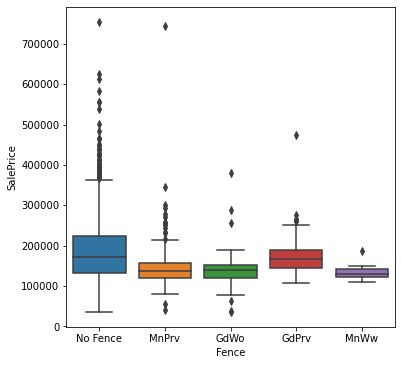

In [28]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x = 'Fence', y = 'SalePrice', data = houseDF)

In [29]:
# 80% of the data does not contain fence

### Analyzing and imputing basement related columns

In [30]:
houseDF["BsmtQual"] = houseDF["BsmtQual"].fillna("None")
houseDF["BsmtQual"].value_counts()
houseDF["BsmtQual"].value_counts()/len(houseDF)*100

TA      44.452055
Gd      42.328767
Ex       8.287671
None     2.534247
Fa       2.397260
Name: BsmtQual, dtype: float64

In [31]:
houseDF["BsmtCond"] = houseDF["BsmtCond"].fillna("None")
houseDF["BsmtCond"].value_counts()
houseDF["BsmtCond"].value_counts()/len(houseDF)*100

TA      89.794521
Gd       4.452055
Fa       3.082192
None     2.534247
Po       0.136986
Name: BsmtCond, dtype: float64

In [32]:
houseDF["BsmtExposure"] = houseDF["BsmtExposure"].fillna("None")
houseDF["BsmtExposure"].value_counts()
houseDF["BsmtExposure"].value_counts()/len(houseDF)*100

No      65.273973
Av      15.136986
Gd       9.178082
Mn       7.808219
None     2.602740
Name: BsmtExposure, dtype: float64

In [33]:
houseDF["BsmtFinType1"] = houseDF["BsmtFinType1"].fillna("None")
houseDF["BsmtFinType1"].value_counts()
houseDF["BsmtFinType1"].value_counts()/len(houseDF)*100

Unf     29.452055
GLQ     28.630137
ALQ     15.068493
BLQ     10.136986
Rec      9.109589
LwQ      5.068493
None     2.534247
Name: BsmtFinType1, dtype: float64

In [34]:
houseDF["BsmtFinType2"] = houseDF["BsmtFinType2"].fillna("None")
houseDF["BsmtFinType2"].value_counts()
houseDF["BsmtFinType2"].value_counts()/len(houseDF)*100


Unf     86.027397
Rec      3.698630
LwQ      3.150685
None     2.602740
BLQ      2.260274
ALQ      1.301370
GLQ      0.958904
Name: BsmtFinType2, dtype: float64

In [35]:
# basement columns:
house_Basement = houseDF[["BsmtQual","BsmtCond","BsmtExposure", "BsmtFinType1", "BsmtFinType2","BsmtFinSF1", "BsmtFinSF2",
                         "BsmtUnfSF","TotalBsmtSF"]]

In [36]:
house_Basement

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
0,Gd,TA,No,GLQ,Unf,706,0,150,856
1,Gd,TA,Gd,ALQ,Unf,978,0,284,1262
2,Gd,TA,Mn,GLQ,Unf,486,0,434,920
3,TA,Gd,No,ALQ,Unf,216,0,540,756
4,Gd,TA,Av,GLQ,Unf,655,0,490,1145
...,...,...,...,...,...,...,...,...,...
1455,Gd,TA,No,Unf,Unf,0,0,953,953
1456,Gd,TA,No,ALQ,Rec,790,163,589,1542
1457,TA,Gd,No,GLQ,Unf,275,0,877,1152
1458,TA,TA,Mn,GLQ,Rec,49,1029,0,1078


<Figure size 1440x864 with 0 Axes>

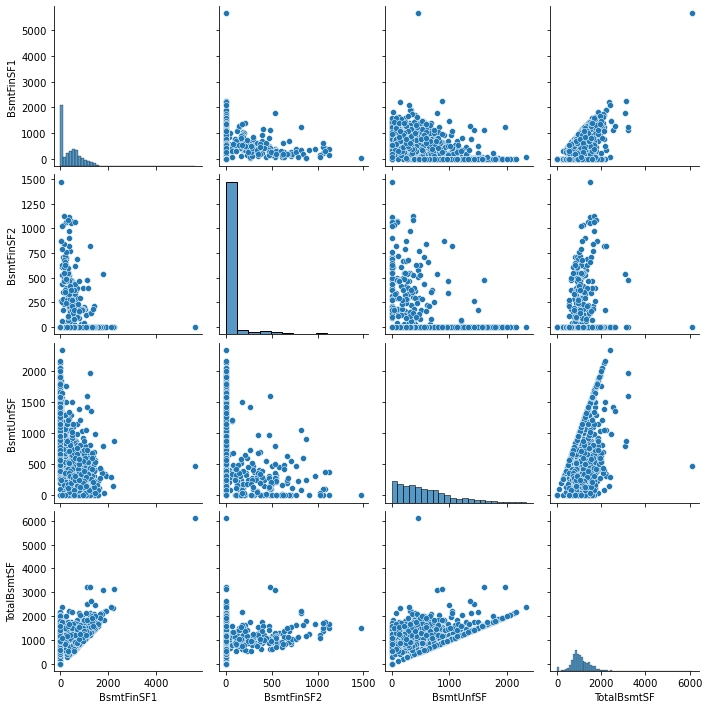

In [37]:
#plot a pair plot for basement related columns
plt.figure(figsize=(20, 12))
sns.pairplot(house_Basement)
plt.show()

From the plot we can observe that the we can drop "BsmtFinSF1", "BsmtFinSF2","BsmtUnfSF". 

Plotting the box plots remainig basement related colums to see the effect of those features with the target varibale Sales priice

<AxesSubplot:xlabel='BsmtFinType2', ylabel='SalePrice'>

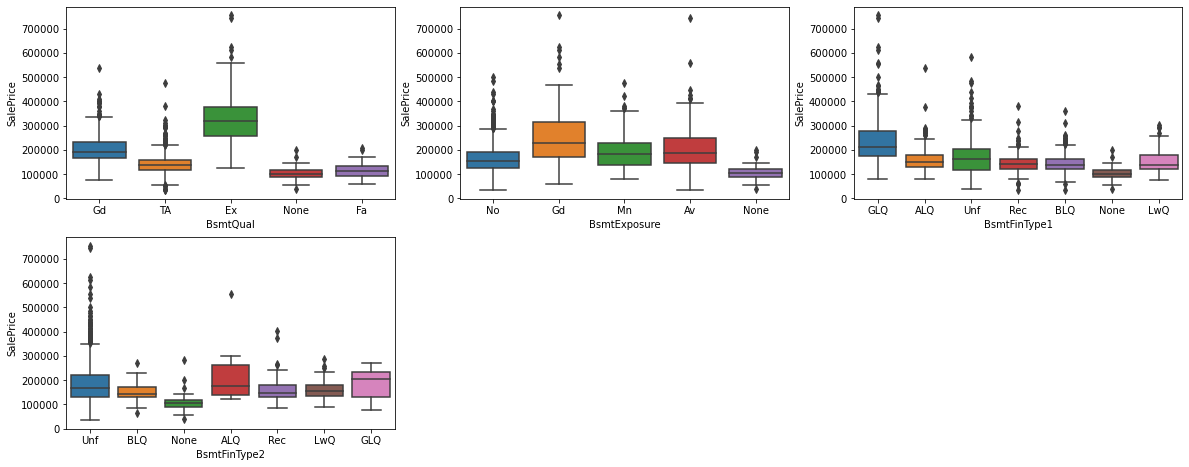

In [38]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'BsmtQual', y = 'SalePrice', data = houseDF)
plt.subplot(3,3,2)
sns.boxplot(x = 'BsmtExposure', y = 'SalePrice', data = houseDF)
plt.subplot(3,3,3)
sns.boxplot(x = 'BsmtFinType1',y = 'SalePrice', data = houseDF)
plt.subplot(3,3,4)
sns.boxplot(x = 'BsmtFinType2',y = 'SalePrice', data = houseDF)

We can drop BsmtFinType2, BsmtFinType1, BsmtExposure as they dont havemuch influence on sales price.

Dropping some of the basement related columns as they dont show much influence with the target variable

In [39]:
#drop the columns
basementcolList = ["BsmtFinSF1", "BsmtFinSF2","BsmtUnfSF","BsmtFinType2", "BsmtFinType1", "BsmtExposure" ]
houseDF.drop(basementcolList, axis=1, inplace=True)
#cheking the shape of the house price data set after dropping basement variables
houseDF.shape

(1460, 53)

In [40]:
# imputing MasVnrArea column null values
houseDF["MasVnrArea"] = houseDF["MasVnrArea"].replace(np.nan, houseDF["MasVnrArea"].median())
houseDF["MasVnrArea"] = houseDF["MasVnrArea"].astype('int')

In [41]:
# checking for the remaining null values in the dataset
round(100*houseDF.isnull().sum()[(houseDF.isnull().sum()>0)]/len(houseDF), 2)

MasVnrType      0.55
FireplaceQu    47.26
GarageType      5.55
GarageYrBlt     5.55
GarageQual      5.55
dtype: float64

#### Analyzing Garage columns

In [43]:
#GarageType, GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
houseDF["GarageYrBlt"] = houseDF["GarageYrBlt"].fillna(0)

In [44]:
houseDF["GarageType"] = houseDF["GarageType"].astype('str')
houseDF["GarageType"] = houseDF["GarageType"].str.replace("nan", "No Garage")
print(houseDF["GarageType"].describe())
print(houseDF["GarageType"].value_counts())
houseDF['GarageType'].value_counts()/len(houseDF['GarageType'])*100

count       1460
unique         7
top       Attchd
freq         870
Name: GarageType, dtype: object
Attchd       870
Detchd       387
BuiltIn       88
No Garage     81
Basment       19
CarPort        9
2Types         6
Name: GarageType, dtype: int64


Attchd       59.589041
Detchd       26.506849
BuiltIn       6.027397
No Garage     5.547945
Basment       1.301370
CarPort       0.616438
2Types        0.410959
Name: GarageType, dtype: float64

In [45]:
houseDF['GarageYrBlt'].value_counts()/len(houseDF['GarageYrBlt'])*100

0.0       5.547945
2005.0    4.452055
2006.0    4.041096
2004.0    3.630137
2003.0    3.424658
            ...   
1927.0    0.068493
1900.0    0.068493
1906.0    0.068493
1908.0    0.068493
1933.0    0.068493
Name: GarageYrBlt, Length: 98, dtype: float64

In [46]:
print(houseDF['GarageQual'].value_counts())
print(houseDF['GarageQual'].describe())
houseDF["GarageQual"] = houseDF["GarageQual"].str.replace("nan", "No Garage")
print(houseDF['GarageQual'].value_counts()/len(houseDF['GarageQual'])*100)

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64
count     1379
unique       5
top         TA
freq      1311
Name: GarageQual, dtype: object
TA    89.794521
Fa     3.287671
Gd     0.958904
Ex     0.205479
Po     0.205479
Name: GarageQual, dtype: float64


In [47]:
# It almost contains 90% of TA value in GargeQual so we can remove that column

In [48]:
print(houseDF["GarageFinish"].value_counts())
print(houseDF['GarageFinish'].value_counts()/len(houseDF['GarageFinish'])*100)

Unf          605
RFn          422
Fin          352
No Garage     81
Name: GarageFinish, dtype: int64
Unf          41.438356
RFn          28.904110
Fin          24.109589
No Garage     5.547945
Name: GarageFinish, dtype: float64


#### Plotting Garage related columns with the target variable Sales price

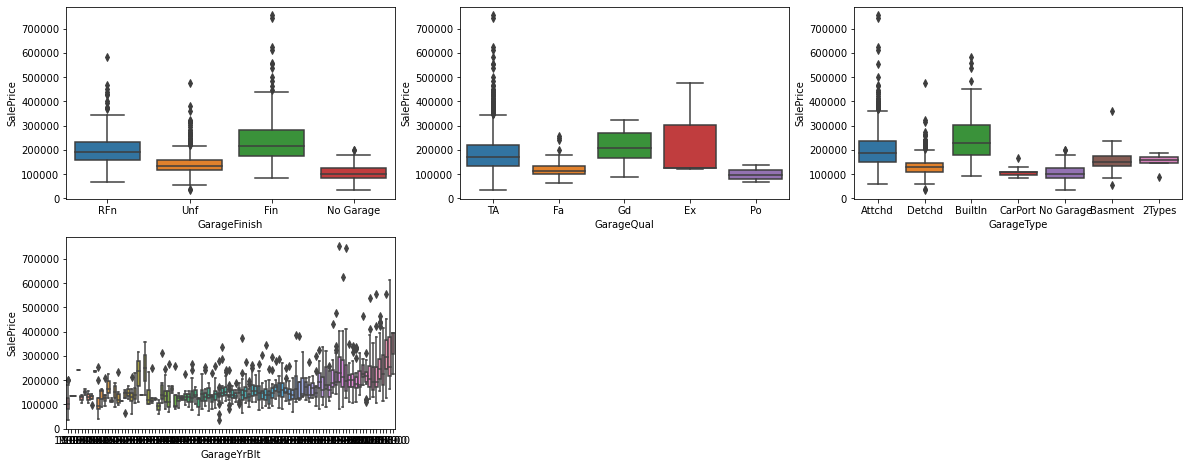

In [49]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'GarageFinish', y = 'SalePrice', data = houseDF)
plt.subplot(3,3,2)
sns.boxplot(x = 'GarageQual', y = 'SalePrice', data = houseDF)
plt.subplot(3,3,3)
sns.boxplot(x = 'GarageType',y = 'SalePrice', data = houseDF)
plt.subplot(3,3,4)
sns.boxplot(x = 'GarageYrBlt',y = 'SalePrice', data = houseDF)
plt.show()

From the plots plotted above and value_caounts calculation GarageQual, MasVnrArea are less influence varibles. So we can drop them

In [51]:
houseDF.drop("GarageQual", axis=1, inplace=True)
houseDF.shape

(1460, 52)

In [52]:
houseDF.drop("MasVnrArea", axis=1, inplace=True)
houseDF.shape

(1460, 51)

### Fireplace column

In [53]:
houseDF["FireplaceQu"] = houseDF["FireplaceQu"].fillna("No Fireplace")
houseDF["FireplaceQu"].head(20)

0     No Fireplace
1               TA
2               TA
3               Gd
4               TA
5     No Fireplace
6               Gd
7               TA
8               TA
9               TA
10    No Fireplace
11              Gd
12    No Fireplace
13              Gd
14              Fa
15    No Fireplace
16              TA
17    No Fireplace
18    No Fireplace
19    No Fireplace
Name: FireplaceQu, dtype: object

In [54]:
# MasVnrType column imputing and analyzing

In [55]:
houseDF['MasVnrType'] = houseDF['MasVnrType'].fillna("None")
houseDF['MasVnrType'].value_counts()/len(houseDF['MasVnrType'])*100

None       59.726027
BrkFace    30.479452
Stone       8.767123
BrkCmn      1.027397
Name: MasVnrType, dtype: float64

In [56]:
round(100*houseDF.isnull().sum()[(houseDF.isnull().sum()>0)]/len(houseDF), 2)


Series([], dtype: float64)

In [57]:
# Now there is no nullable columns and rows

In [58]:
houseDF.shape

(1460, 51)

In [59]:
#Correlation map to see how features are correlated with SalePrice
corrmat = houseDF.corr()
print(corrmat)

               MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.356718 -0.139781     0.032628    -0.059316   
LotFrontage     -0.356718     1.000000  0.304522     0.234812    -0.053281   
LotArea         -0.139781     0.304522  1.000000     0.105806    -0.005636   
OverallQual      0.032628     0.234812  0.105806     1.000000    -0.091932   
OverallCond     -0.059316    -0.053281 -0.005636    -0.091932     1.000000   
YearBuilt        0.027850     0.116685  0.014228     0.572323    -0.375983   
YearRemodAdd     0.040581     0.083348  0.013788     0.550684     0.073741   
TotalBsmtSF     -0.238518     0.363472  0.260833     0.537808    -0.171098   
1stFlrSF        -0.251758     0.413773  0.299475     0.476224    -0.144203   
2ndFlrSF         0.307886     0.072388  0.050986     0.295493     0.028942   
GrLivArea        0.074853     0.368007  0.263116     0.593007    -0.079686   
BsmtFullBath     0.003491     0.090343  0.158155     0.111098   

<AxesSubplot:>

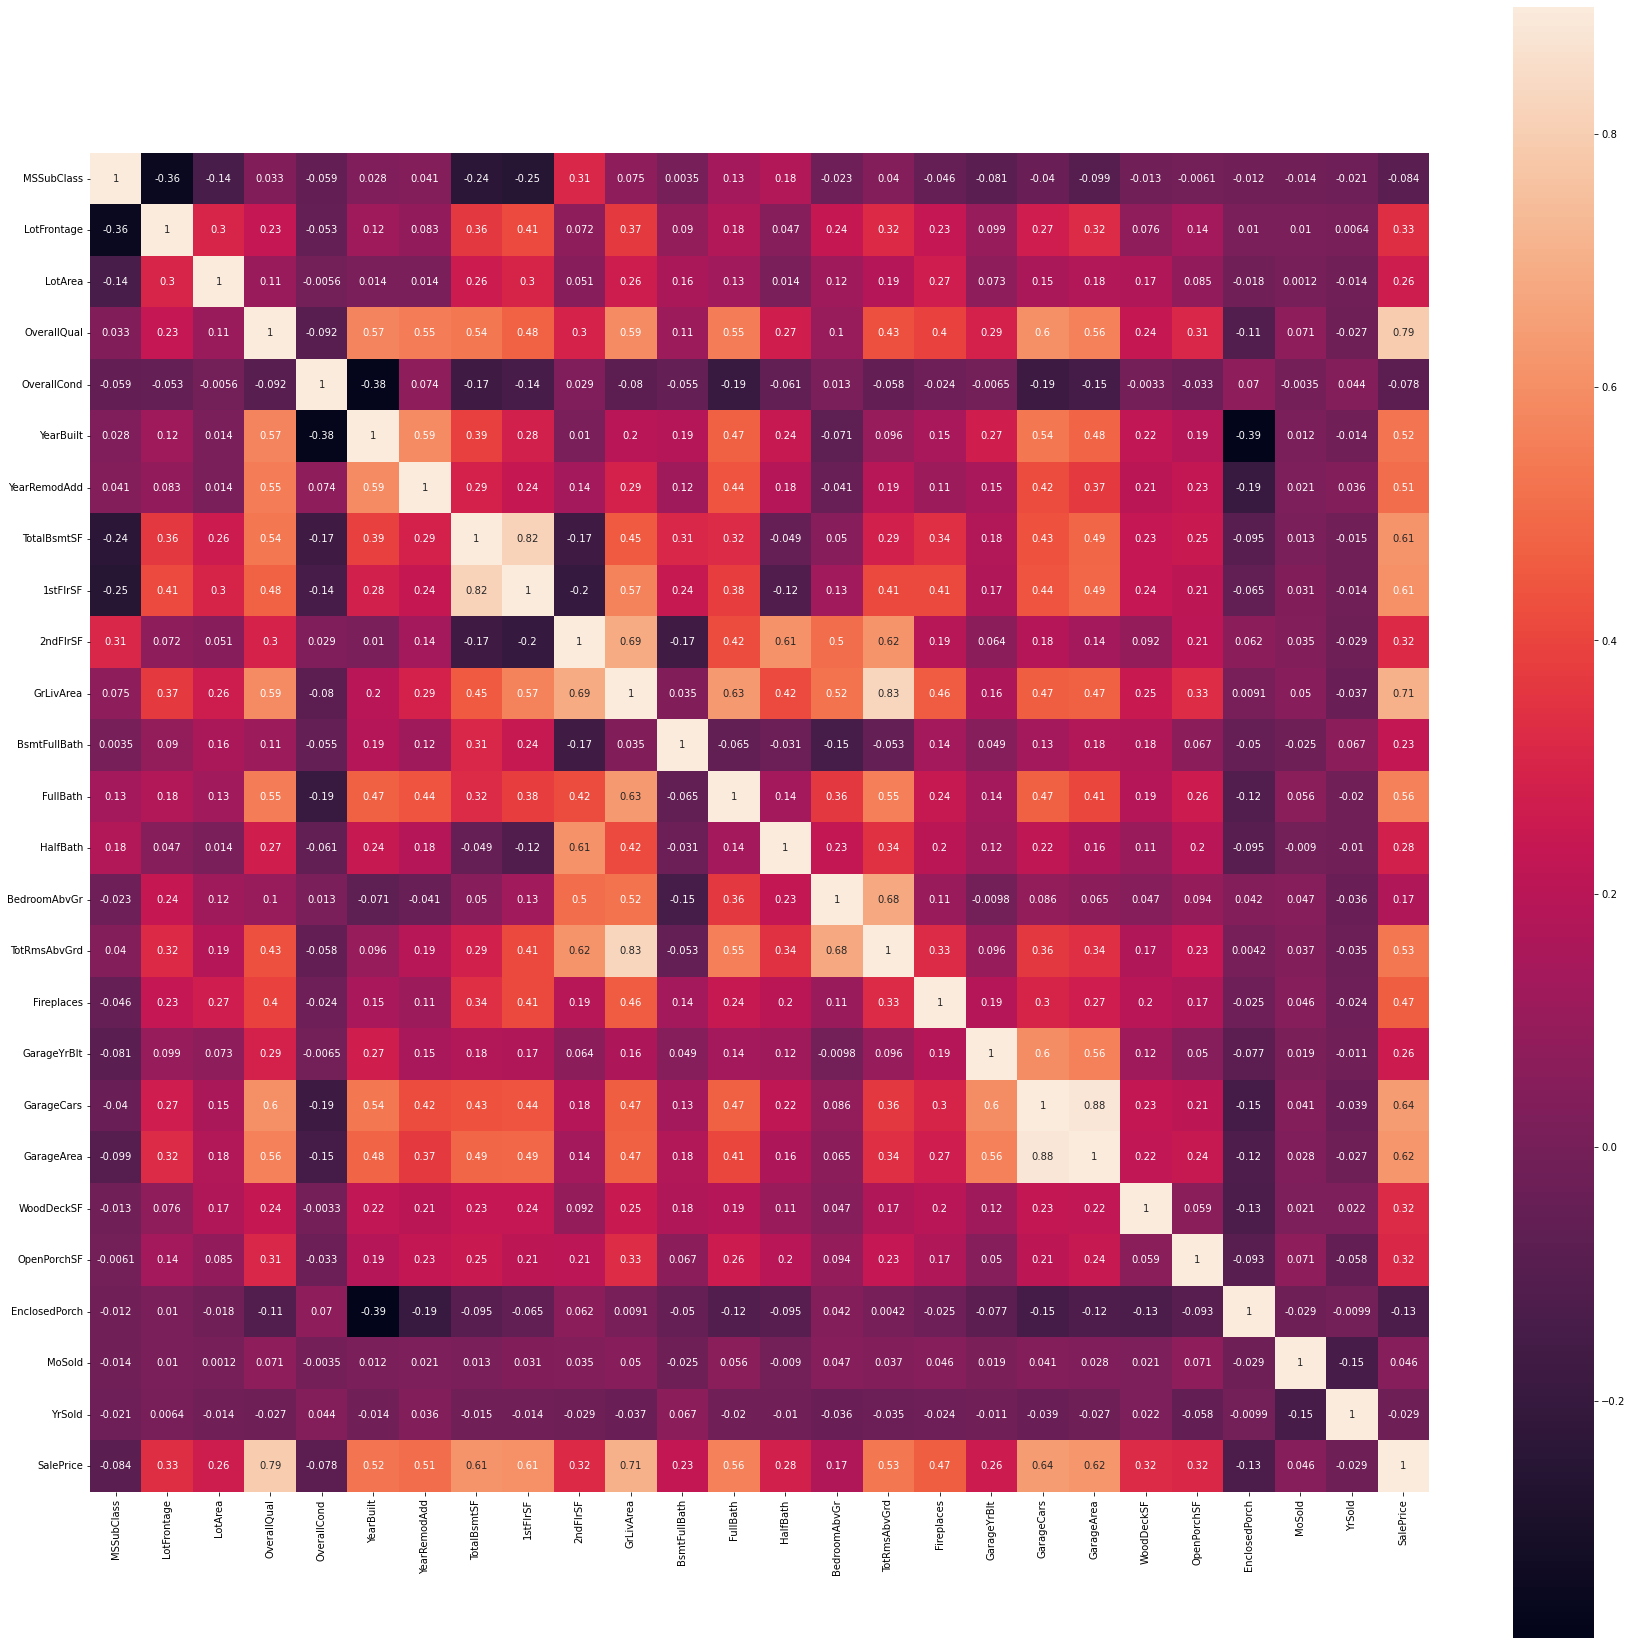

In [60]:
plt.subplots(figsize=(30,30))
sns.heatmap(corrmat, vmax=0.9, square=True, annot = True)

In [61]:
# Checking outliers at 25%,50%,75%,90%,95% and above
houseDF.describe(percentiles=[.25,.5,.75,.90,.95,.99]).transpose()

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,120.0,160.00,190.00,190.0
LotFrontage,1460.0,69.863699,22.027677,21.0,60.00,69.0,79.00,92.0,104.00,137.41,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,14381.7,17401.15,37567.64,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,8.0,8.00,10.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,7.0,8.00,9.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2006.0,2007.00,2009.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2006.0,2007.00,2009.00,2010.0
TotalBsmtSF,1460.0,1057.429452,438.705324,0.0,795.75,991.5,1298.25,1602.2,1753.00,2155.05,6110.0
1stFlrSF,1460.0,1162.626712,386.587738,334.0,882.00,1087.0,1391.25,1680.0,1831.25,2219.46,4692.0
2ndFlrSF,1460.0,346.992466,436.528436,0.0,0.00,0.0,728.00,954.2,1141.05,1418.92,2065.0


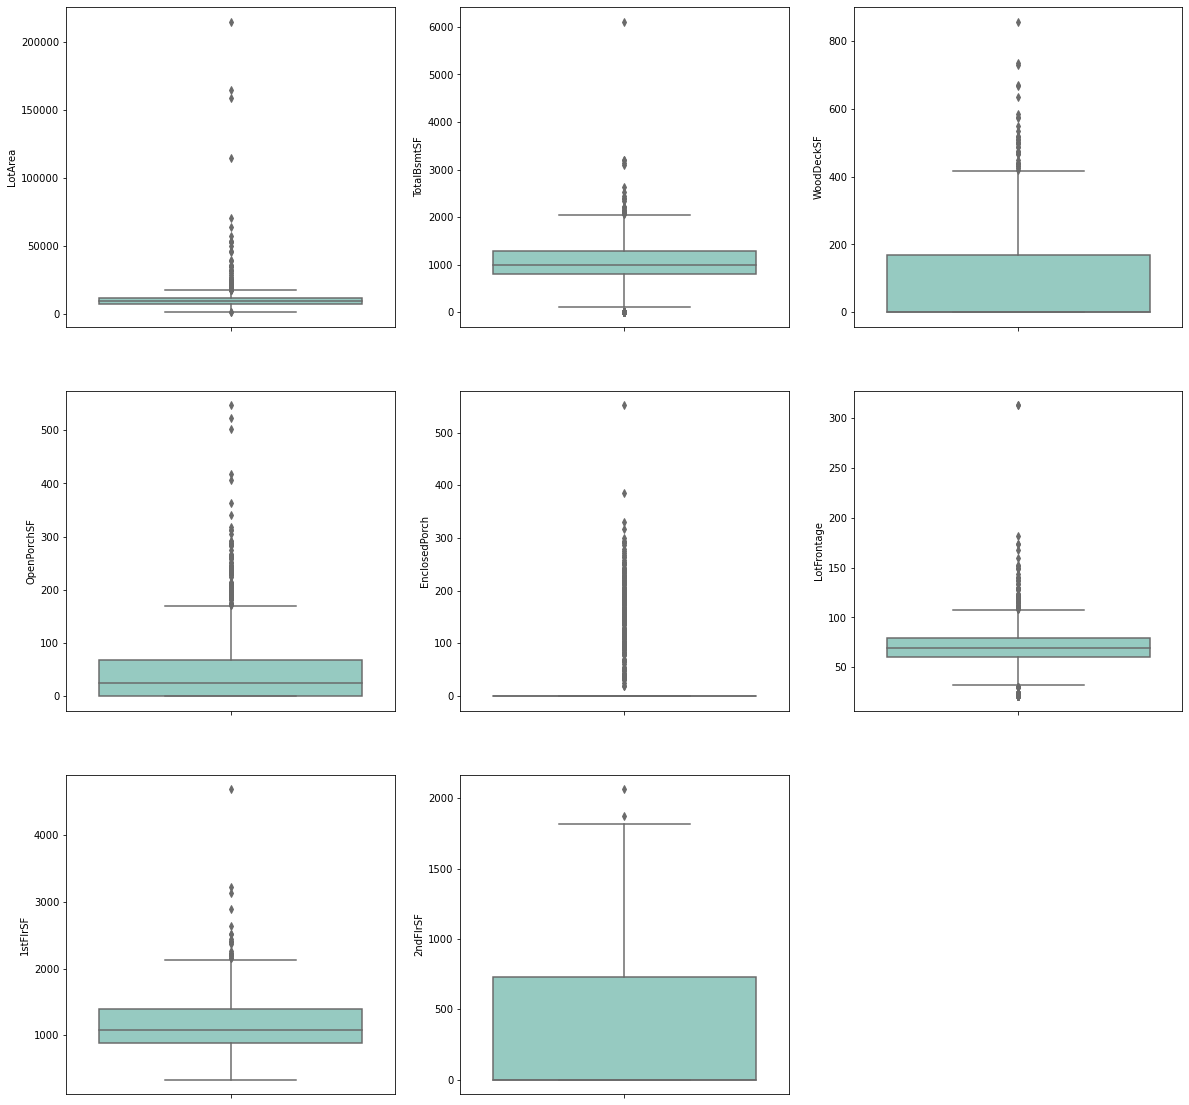

In [62]:
# checking for the outliers in all the numeric columns
plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
sns.boxplot(y="LotArea",palette='Set3', data = houseDF)
plt.subplot(3,3,2)
sns.boxplot(y="TotalBsmtSF",palette='Set3', data = houseDF)
plt.subplot(3,3,3)
sns.boxplot(y = 'WoodDeckSF', palette='Set3', data = houseDF)
plt.subplot(3,3,4)
sns.boxplot(y = 'OpenPorchSF', palette='Set3', data = houseDF)
plt.subplot(3,3,5)
sns.boxplot(y = 'EnclosedPorch', palette='Set3', data = houseDF)
plt.subplot(3,3,6)
sns.boxplot(y = 'LotFrontage', palette='Set3', data = houseDF)
plt.subplot(3,3,7)
sns.boxplot(y = '1stFlrSF', palette='Set3', data = houseDF)
plt.subplot(3,3,8)
sns.boxplot(y = '2ndFlrSF', palette='Set3', data = houseDF)

plt.show()

In [63]:
# Removing Outliers

# Removing values beyond 99% for LotArea
houseDF = houseDF[houseDF["LotArea"] < houseDF['LotArea'].quantile(0.99)]

# Removing values beyond 99% for TotalBsmtSF
houseDF = houseDF[houseDF["TotalBsmtSF"] < houseDF['TotalBsmtSF'].quantile(0.99)]


# Removing values beyond 99% for WoodDeckSF
houseDF = houseDF[houseDF["WoodDeckSF"] < houseDF['WoodDeckSF'].quantile(0.99)]


# Removing values beyond 99% for OpenPorchSF
houseDF = houseDF[houseDF["OpenPorchSF"] < houseDF['OpenPorchSF'].quantile(0.99)]

# Removing values beyond 99% for OpenPorchSF
houseDF = houseDF[houseDF["EnclosedPorch"] < houseDF['EnclosedPorch'].quantile(0.99)]

In [64]:
houseDF.shape

(1386, 51)

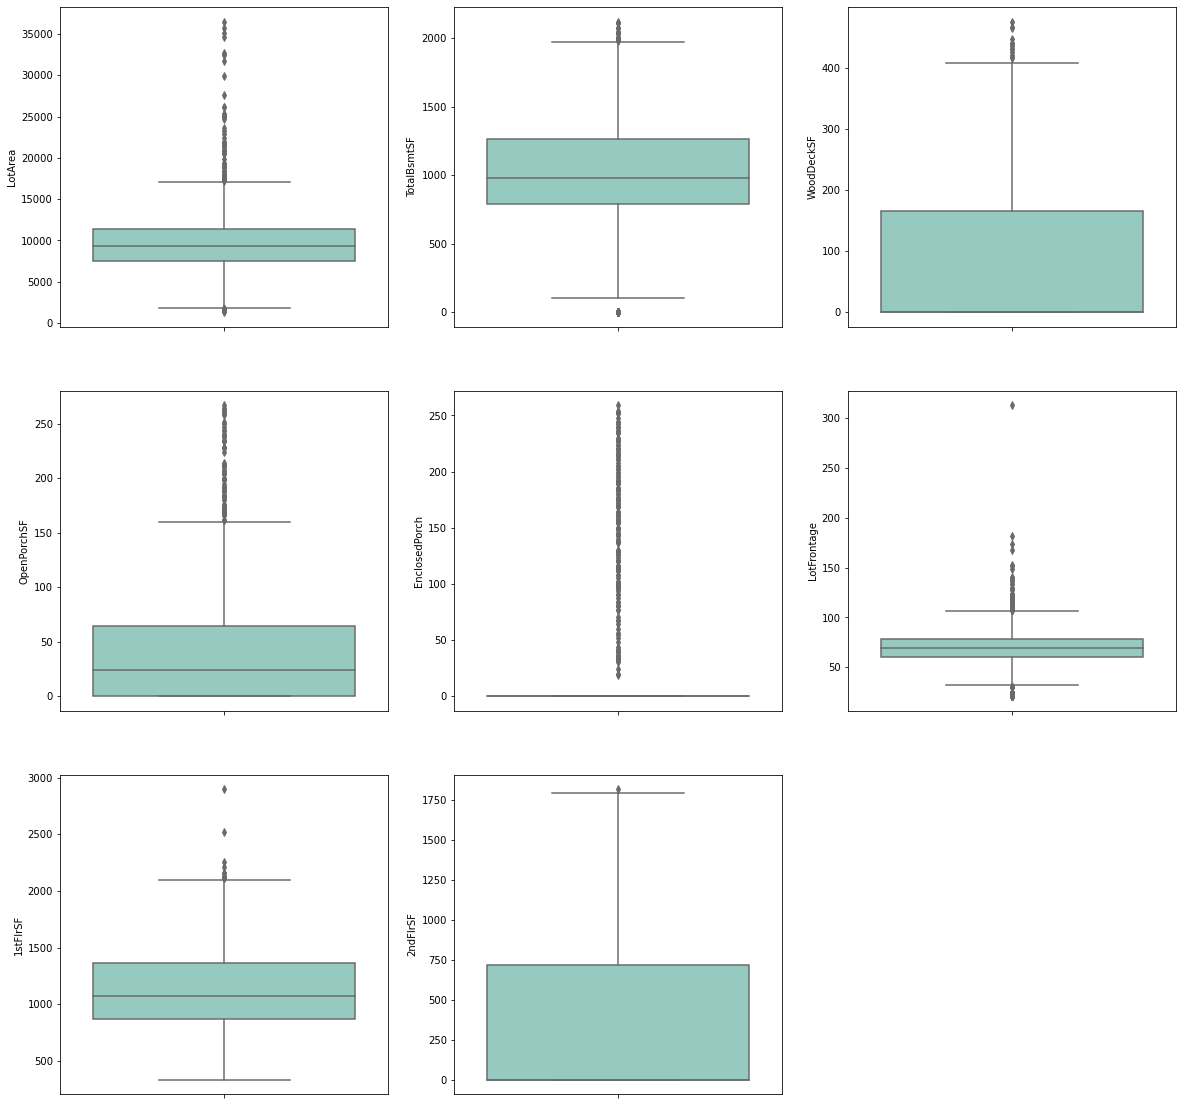

In [65]:
# checking for the outliers in all the numeric columns
plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
sns.boxplot(y="LotArea",palette='Set3', data = houseDF)
plt.subplot(3,3,2)
sns.boxplot(y="TotalBsmtSF",palette='Set3', data = houseDF)
plt.subplot(3,3,3)
sns.boxplot(y = 'WoodDeckSF', palette='Set3', data = houseDF)
plt.subplot(3,3,4)
sns.boxplot(y = 'OpenPorchSF', palette='Set3', data = houseDF)
plt.subplot(3,3,5)
sns.boxplot(y = 'EnclosedPorch', palette='Set3', data = houseDF)
plt.subplot(3,3,6)
sns.boxplot(y = 'LotFrontage', palette='Set3', data = houseDF)
plt.subplot(3,3,7)
sns.boxplot(y = '1stFlrSF', palette='Set3', data = houseDF)
plt.subplot(3,3,8)
sns.boxplot(y = '2ndFlrSF', palette='Set3', data = houseDF)

plt.show()

In [66]:
# Determine the percentage of data retained after removing the outliers
num_data = round(100*(len(houseDF)/1460),2)
print(num_data)


94.93


### Data Visualization

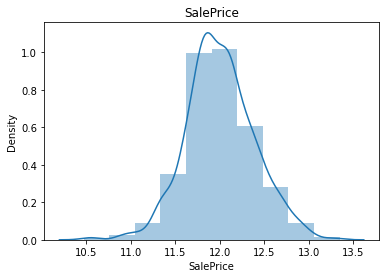

In [67]:
# transform the sales price
houseDF['SalePrice'] = np.log1p(houseDF['SalePrice'])

plt.title('SalePrice')
sns.distplot(houseDF['SalePrice'], bins=10)
plt.show()

In [68]:
# Check the numerical values using pairplots

houseNum1=houseDF[['LotFrontage','LotArea','MSSubClass','OverallQual', 'OverallCond','TotalBsmtSF', '1stFlrSF','2ndFlrSF', 'GrLivArea',
                  'SalePrice']]

houseNum2=houseDF[['BsmtFullBath','FullBath', 'HalfBath','BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces','GarageCars','GarageArea', 'WoodDeckSF',               
'OpenPorchSF','SalePrice']]

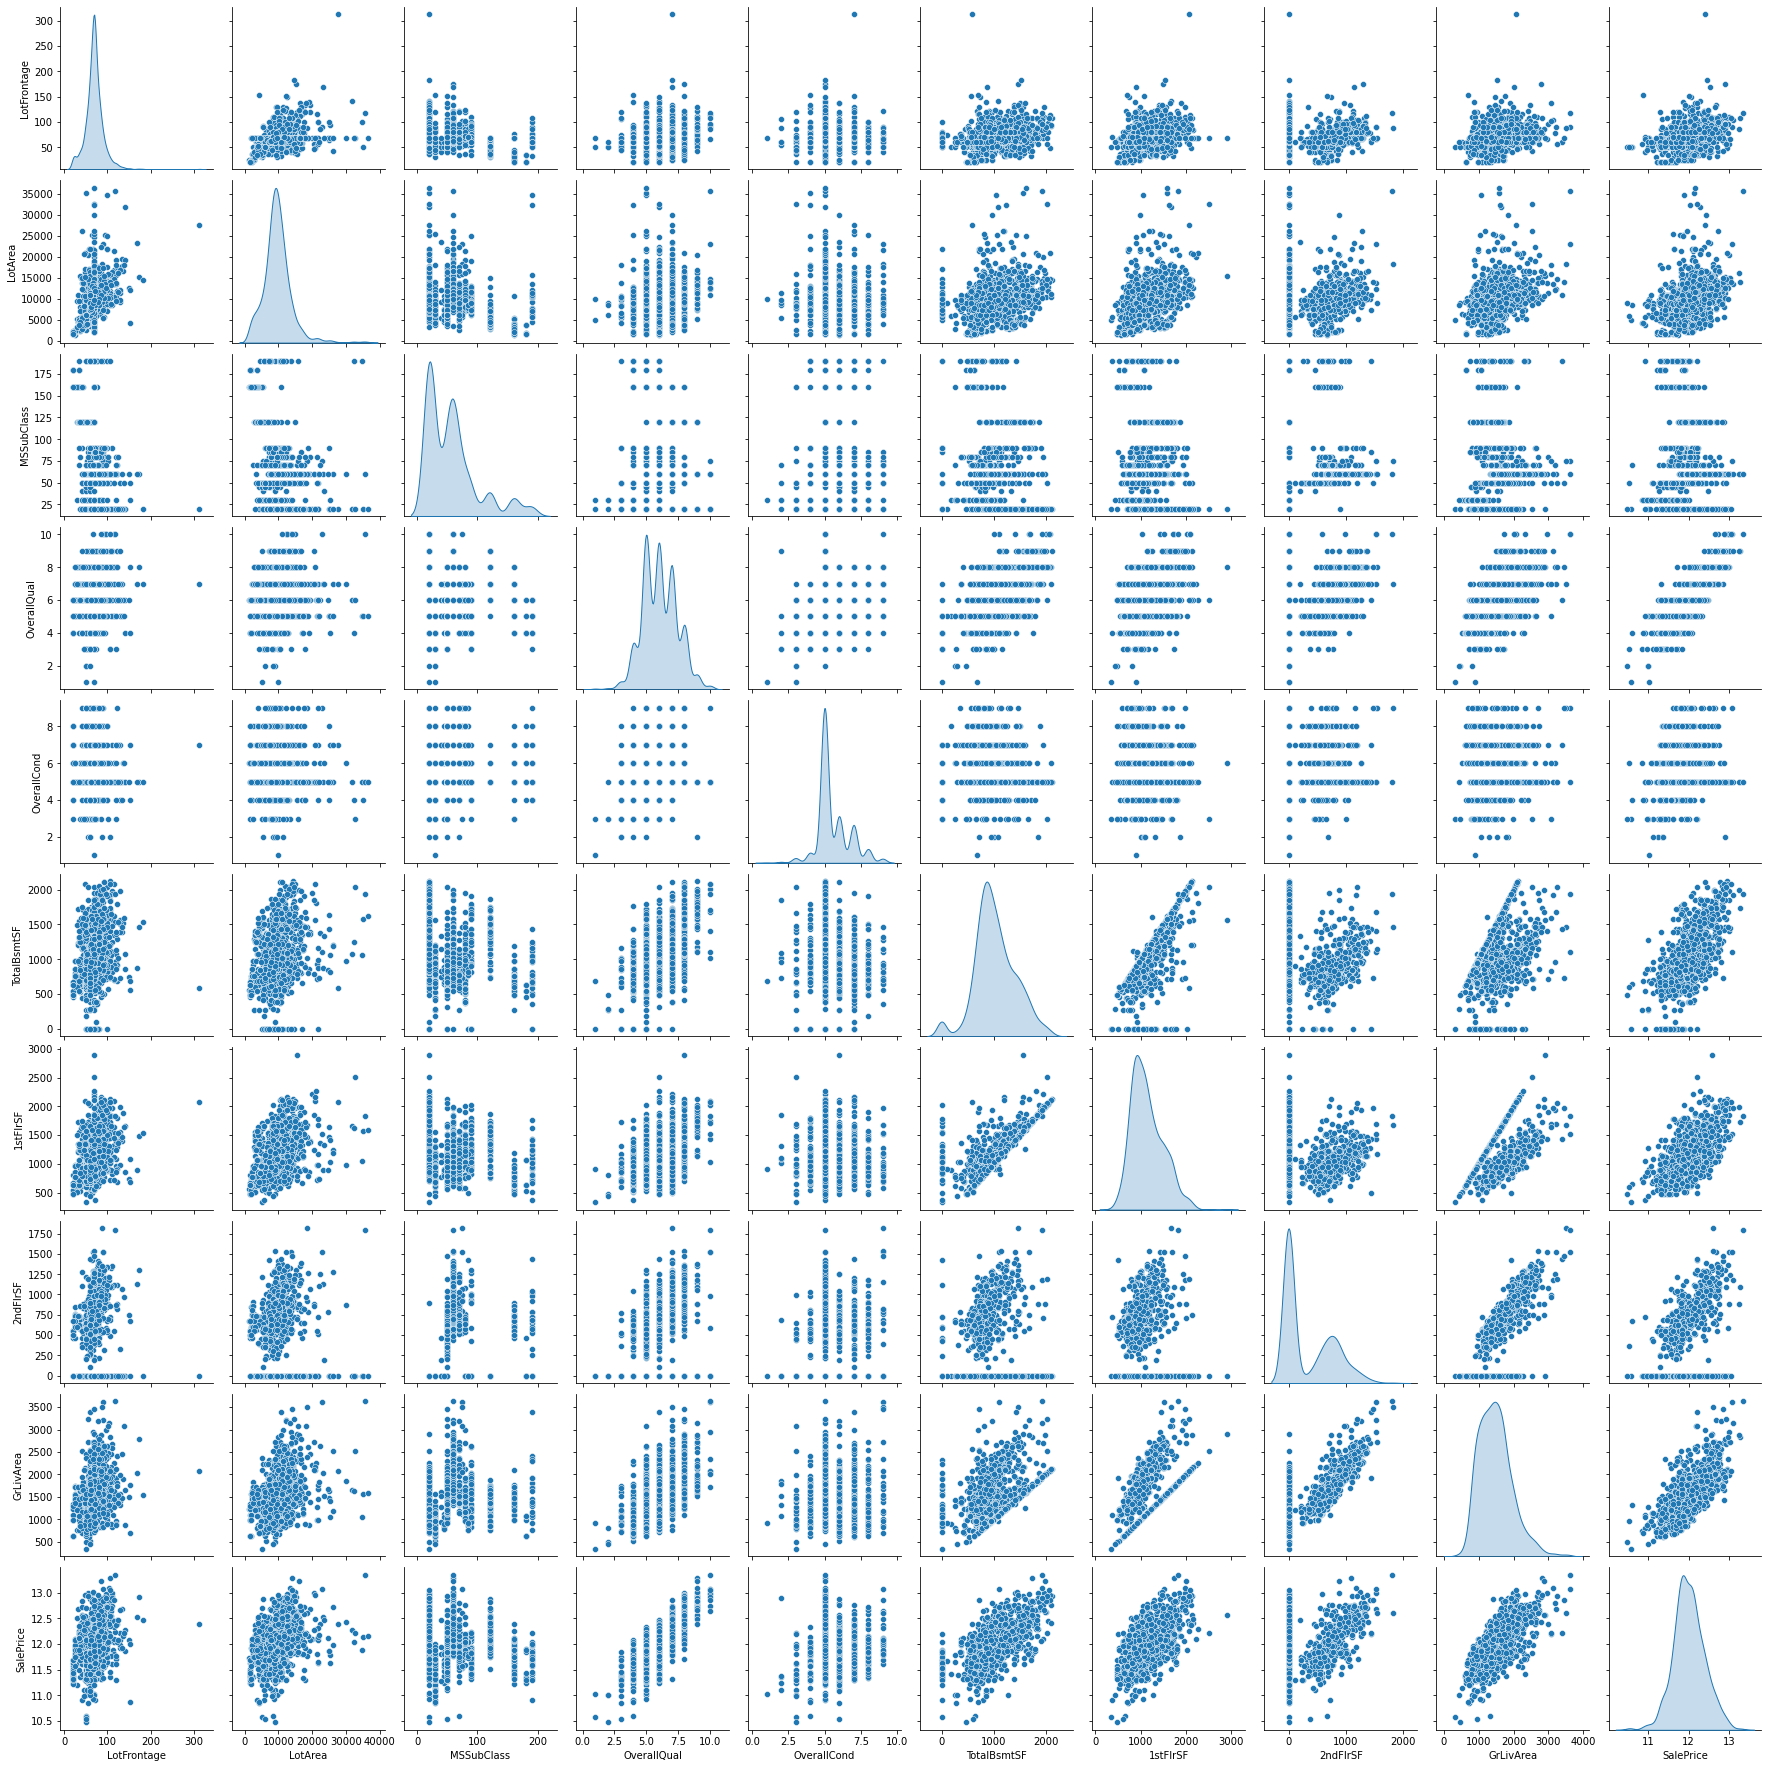

In [69]:
sns.pairplot(houseNum1, diag_kind='kde')
plt.show()

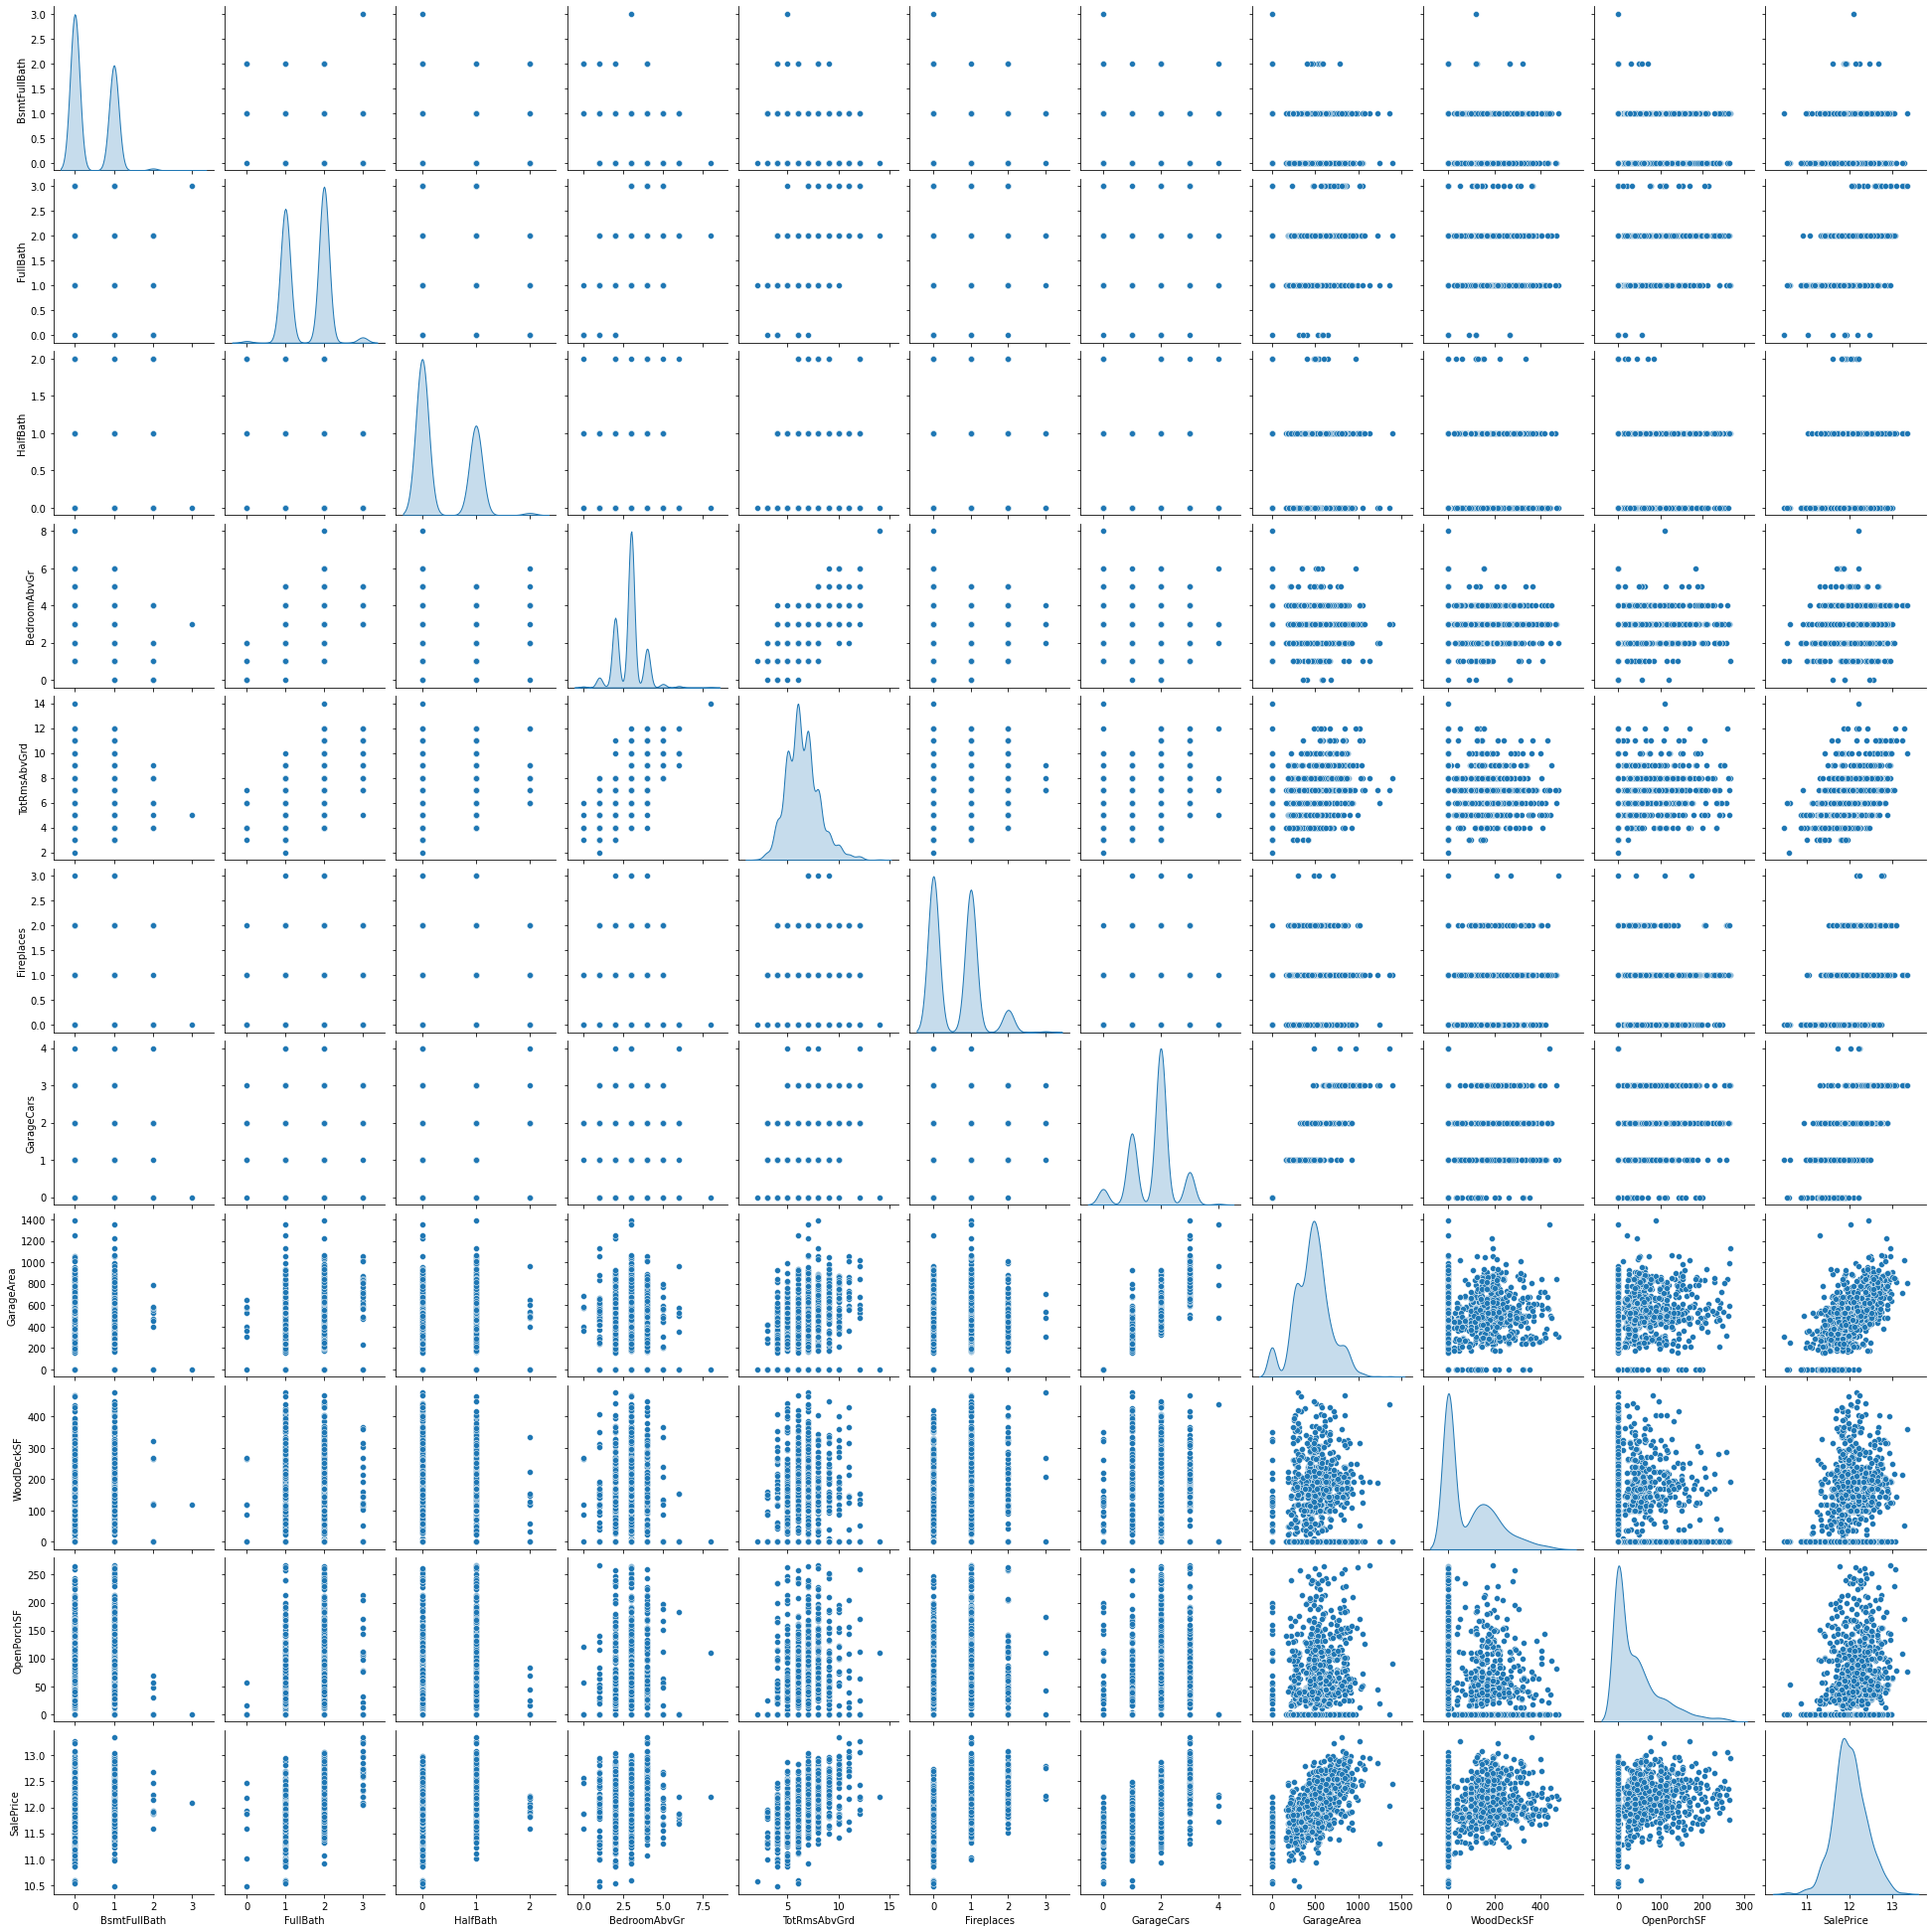

In [70]:
sns.pairplot(houseNum2, diag_kind='kde')
plt.show()

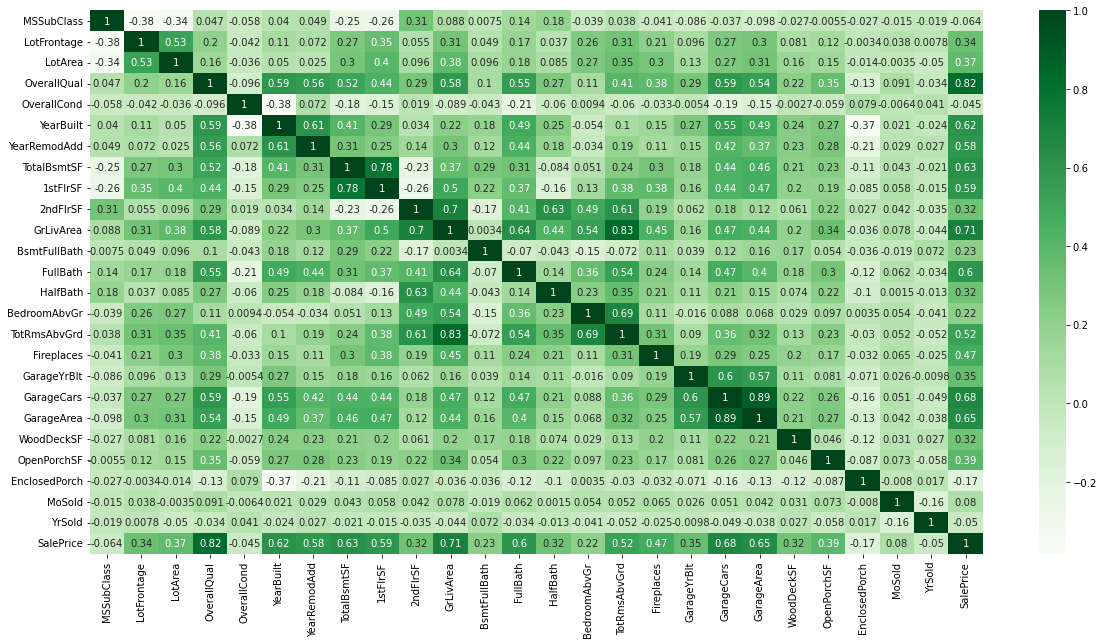

In [71]:
plt.figure(figsize = (20, 10))
sns.heatmap(houseDF.corr(), annot = True, cmap="Greens")
plt.show()

In [72]:
# Removing following columns which shows high correlation

# TotRmsAbvGrd and GrLivArea show 83%
# Garage Area and Garage Cars show 89%

In [73]:
houseDF.drop(['TotRmsAbvGrd', 'GarageArea'], axis = 1, inplace = True)

In [74]:
houseDF.shape

(1386, 49)

In [75]:
houseDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1386 entries, 0 to 1458
Data columns (total 49 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1386 non-null   int64  
 1   MSZoning       1386 non-null   object 
 2   LotFrontage    1386 non-null   float64
 3   LotArea        1386 non-null   int64  
 4   LotShape       1386 non-null   object 
 5   LandContour    1386 non-null   object 
 6   LotConfig      1386 non-null   object 
 7   Neighborhood   1386 non-null   object 
 8   Condition1     1386 non-null   object 
 9   BldgType       1386 non-null   object 
 10  HouseStyle     1386 non-null   object 
 11  OverallQual    1386 non-null   int64  
 12  OverallCond    1386 non-null   int64  
 13  YearBuilt      1386 non-null   int64  
 14  YearRemodAdd   1386 non-null   int64  
 15  RoofStyle      1386 non-null   object 
 16  Exterior1st    1386 non-null   object 
 17  Exterior2nd    1386 non-null   object 
 18  MasVnrTy

### Newly derived columns

In [76]:
houseDF[["YearBuilt", "YearRemodAdd", "GarageYrBlt", "YrSold"]].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
4,2000,2000,2000.0,2008
5,1993,1995,1993.0,2009


In [77]:
# Create a new column named IsRemodelled - This column can determine whether the house has been remodelled or not based on 
# the difference between remodelled and built years

def checkRemodel(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return 2
    
houseDF['IsRemodelled'] = houseDF.apply(checkRemodel, axis=1)
houseDF.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice,IsRemodelled
0,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,...,0,61,0,No Fence,2,2008,WD,Normal,12.247699,0
1,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,1Fam,...,298,0,0,No Fence,5,2007,WD,Normal,12.109016,0
2,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,...,0,42,0,No Fence,9,2008,WD,Normal,12.317171,1
4,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,1Fam,...,192,84,0,No Fence,12,2008,WD,Normal,12.429220,0
5,50,RL,85.0,14115,IR1,Lvl,Inside,Mitchel,Norm,1Fam,...,40,30,0,MnPrv,10,2009,WD,Normal,11.870607,1


In [78]:
# Create a new column named BuiltOrRemodelledAge and determine the age of the building at the time of selling

def funBuiltOrRemodelAge(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
       
houseDF['BuiltOrRemodelAge'] = houseDF.apply(funBuiltOrRemodelAge, axis=1)
houseDF.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,...,OpenPorchSF,EnclosedPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge
0,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,...,61,0,No Fence,2,2008,WD,Normal,12.247699,0,5
1,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,1Fam,...,0,0,No Fence,5,2007,WD,Normal,12.109016,0,31
2,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,...,42,0,No Fence,9,2008,WD,Normal,12.317171,1,6
4,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,1Fam,...,84,0,No Fence,12,2008,WD,Normal,12.429220,0,8
5,50,RL,85.0,14115,IR1,Lvl,Inside,Mitchel,Norm,1Fam,...,30,0,MnPrv,10,2009,WD,Normal,11.870607,1,14


In [79]:
# Create a new column which would indicate if the Garage is old or new.
# Garage Yr Built less than 2000 will be considered as old (0) else new(1). 
# For GarageYrBuilt , where we have imputed the value as 0 will also be treated as old.

def GarageConstructionPeriod(row):
    if row == 0:
        return 0
    elif row >= 1900 and row < 2000:        
        return 0
    else:   
        return 1
    
houseDF['OldOrNewGarage'] = houseDF['GarageYrBlt'].apply(GarageConstructionPeriod)
houseDF.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,...,EnclosedPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
0,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,...,0,No Fence,2,2008,WD,Normal,12.247699,0,5,1
1,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,1Fam,...,0,No Fence,5,2007,WD,Normal,12.109016,0,31,0
2,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,...,0,No Fence,9,2008,WD,Normal,12.317171,1,6,1
4,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,1Fam,...,0,No Fence,12,2008,WD,Normal,12.429220,0,8,1
5,50,RL,85.0,14115,IR1,Lvl,Inside,Mitchel,Norm,1Fam,...,0,MnPrv,10,2009,WD,Normal,11.870607,1,14,0


In [80]:
# Since we have created new features from YearBuilt, YearRemodAdd, YrSold and GarageYrBlt, we can drop these columns as we 
# we can use the derived columns for further analysis

houseDF.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)

In [81]:
houseDF.shape

(1386, 48)

In [82]:
houseDF[['ExterQual','BsmtQual','BsmtCond',
            'HeatingQC',  'KitchenQual','GarageFinish',
             'ExterCond','LotShape']].head()

,ExterQual,BsmtQual,BsmtCond,HeatingQC,KitchenQual,GarageFinish,ExterCond,LotShape
0,Gd,Gd,TA,Ex,Gd,RFn,TA,Reg
1,TA,Gd,TA,Ex,TA,RFn,TA,Reg
2,Gd,Gd,TA,Ex,Gd,RFn,TA,IR1
4,Gd,Gd,TA,Ex,Gd,RFn,TA,IR1
5,TA,Gd,TA,Ex,TA,Unf,TA,IR1


#### Changing the type to category and labeling the values:

In [83]:
houseDF['ExterQual'] = houseDF['ExterQual'].astype('category')
houseDF['BsmtQual'] = houseDF['BsmtQual'].astype('category')
houseDF['BsmtCond'] = houseDF['BsmtCond'].astype('category')
houseDF['HeatingQC'] = houseDF['HeatingQC'].astype('category')
houseDF['KitchenQual'] = houseDF['KitchenQual'].astype('category')
houseDF['GarageFinish'] = houseDF['GarageFinish'].astype('category')
#houseDF['GarageQual'] = houseDF['GarageQual'].astype('category')
houseDF['ExterCond'] = houseDF['ExterCond'].astype('category')
houseDF['LotShape'] = houseDF['LotShape'].astype('category')
houseDF['Neighborhood'] = houseDF['Neighborhood'].astype('category')

In [84]:
houseDF['ExterQual'] = houseDF.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
houseDF['BsmtQual'] = houseDF.BsmtQual.map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
houseDF['BsmtCond'] = houseDF.BsmtCond.map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
houseDF['HeatingQC'] = houseDF.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
houseDF['KitchenQual'] = houseDF.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
houseDF['FireplaceQu'] = houseDF['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'No Fireplace': 0})
houseDF['GarageFinish'] = houseDF.GarageFinish.map({'No Garage':0,'Unf':1,'RFn':2,'Fin':3})
#houseDF['GarageQual'] = houseDF.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
houseDF['ExterCond'] = houseDF.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
houseDF['LotShape'] = houseDF.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
houseDF['Fence'] = houseDF['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'No Fence': 0 })

In [85]:
#columns change to numerical
houseDF[['ExterQual','BsmtQual','BsmtCond',
            'HeatingQC',  'KitchenQual','GarageFinish',
             'ExterCond','LotShape']].head() #,'GarageQual',

,ExterQual,BsmtQual,BsmtCond,HeatingQC,KitchenQual,GarageFinish,ExterCond,LotShape
0,3,4,3,4,3,2,2,3
1,2,4,3,4,2,2,2,3
2,3,4,3,4,3,2,2,0
4,3,4,3,4,3,2,2,0
5,2,4,3,4,2,1,2,0


In [86]:
# categorical columns
houseDF[['MSZoning','LandContour','LotConfig','Condition1','BldgType',
             'HouseStyle','RoofStyle','Exterior1st',  'Exterior2nd','MasVnrType','Foundation','Neighborhood',
            'GarageType','SaleType','SaleCondition']].head()

,MSZoning,LandContour,LotConfig,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,Foundation,Neighborhood,GarageType,SaleType,SaleCondition
0,RL,Lvl,Inside,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,CollgCr,Attchd,WD,Normal
1,RL,Lvl,FR2,Feedr,1Fam,1Story,Gable,MetalSd,MetalSd,None,CBlock,Veenker,Attchd,WD,Normal
2,RL,Lvl,Inside,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,CollgCr,Attchd,WD,Normal
4,RL,Lvl,FR2,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,NoRidge,Attchd,WD,Normal
5,RL,Lvl,Inside,Norm,1Fam,1.5Fin,Gable,VinylSd,VinylSd,None,Wood,Mitchel,Attchd,WD,Normal


In [87]:
#neighbpurhood column
houseDF["Neighborhood"].value_counts()
houseDF.shape

(1386, 48)

In [88]:
houseDummy = pd.get_dummies(houseDF[['MSZoning','LandContour','LotConfig','Condition1','BldgType',
             'HouseStyle','RoofStyle','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
            'GarageType','SaleType','SaleCondition','Neighborhood']],
                           drop_first=True)

In [89]:
houseNew = pd.concat([houseDF, houseDummy], axis='columns')

In [90]:
print(houseNew.shape)
# dropping the actual variables after getting the dummys
houseNew = houseNew.drop(['MSZoning','LandContour','LotConfig','Condition1','BldgType',
             'HouseStyle','RoofStyle','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
            'GarageType','SaleType','SaleCondition','Neighborhood'], axis="columns")
print(houseNew.shape)

(1386, 163)
(1386, 148)


In [91]:
houseNew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1386 entries, 0 to 1458
Columns: 148 entries, MSSubClass to Neighborhood_Veenker
dtypes: category(8), float64(2), int64(23), uint8(115)
memory usage: 481.9 KB


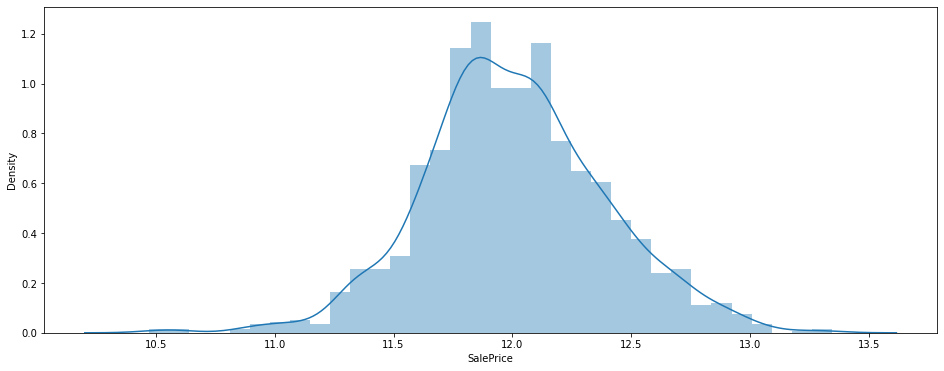

In [92]:
#lets plot the distribution plot of sales price
plt.figure(figsize=(16,6))
sns.distplot(houseNew.SalePrice)
plt.show()

### Creating train and test dataset for validation purpose

In [94]:
house_train, house_test = train_test_split(houseNew, train_size=0.7,test_size = 0.3, random_state=100)

In [95]:
print(house_train.shape)
print(house_train.info())

(970, 148)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 970 entries, 952 to 835
Columns: 148 entries, MSSubClass to Neighborhood_Veenker
dtypes: category(8), float64(2), int64(23), uint8(115)
memory usage: 315.2 KB
None


In [96]:
print(house_test.shape)
print(house_test.info())

(416, 148)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 416 entries, 684 to 497
Columns: 148 entries, MSSubClass to Neighborhood_Veenker
dtypes: category(8), float64(2), int64(23), uint8(115)
memory usage: 136.1 KB
None


In [97]:
houseNew[['MSSubClass','LotArea','OverallQual','OverallCond',
          'TotalBsmtSF','1stFlrSF','2ndFlrSF',
         'GrLivArea','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr',
         'Fireplaces','GarageCars',
          'WoodDeckSF','OpenPorchSF','EnclosedPorch',
        ]]#  'SalePrice'

,MSSubClass,LotArea,OverallQual,OverallCond,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch
0,60,8450,7,5,856,856,854,1710,1,2,1,3,0,2,0,61,0
1,20,9600,6,8,1262,1262,0,1262,0,2,0,3,1,2,298,0,0
2,60,11250,7,5,920,920,866,1786,1,2,1,3,1,2,0,42,0
4,60,14260,8,5,1145,1145,1053,2198,1,2,1,4,1,3,192,84,0
5,50,14115,5,5,796,796,566,1362,1,1,1,1,0,2,40,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,20,7500,7,5,1221,1221,0,1221,1,2,0,2,0,2,0,113,0
1455,60,7917,6,5,953,953,694,1647,0,2,1,3,1,2,0,40,0
1456,20,13175,6,6,1542,2073,0,2073,1,2,0,3,2,2,349,0,0
1457,70,9042,7,9,1152,1188,1152,2340,0,2,0,4,2,1,0,60,0


In [98]:
# Scaling the train dataset

In [99]:
num_col =['MSSubClass','LotArea','OverallQual','OverallCond',           
          'TotalBsmtSF','1stFlrSF','2ndFlrSF',
         'GrLivArea','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr',
         'Fireplaces','GarageCars',
          'WoodDeckSF','OpenPorchSF','EnclosedPorch',
        ]

scaler = StandardScaler()
house_train[num_col] = scaler.fit_transform(house_train[num_col])
house_test[num_col] = scaler.transform(house_test[num_col])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

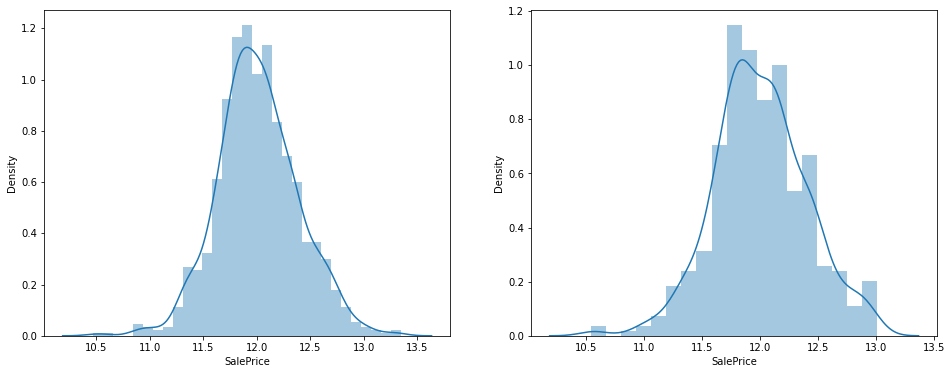

In [100]:
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(house_train.SalePrice)
plt.subplot(122)
sns.distplot(house_test.SalePrice)

#### Fixing target varibale/ independent and dependent varibales

In [101]:
X_train = house_train
y_train = house_train.pop('SalePrice')

X_test = house_test
y_test = house_test.pop('SalePrice')

### Linear Regression
### RFE
#### since there are 148 features we will use RFE to get best 50 of them


In [102]:
lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, 50)            
rfe = rfe.fit(X_train, y_train)

In [103]:
y_LR_Pred = lm.predict(X_train)
print(r2_score(y_train, y_LR_Pred))
RSS = np.sum(np.square(y_train-y_LR_Pred))
print(RSS)
MSE = mean_squared_error(y_train, y_LR_Pred)
print(MSE)
#RMSE
print(MSE*0.5)

0.9342888611507667
9.133068147558465
0.009415534172740686
0.004707767086370343


Text(0.5, 0, 'Errors')

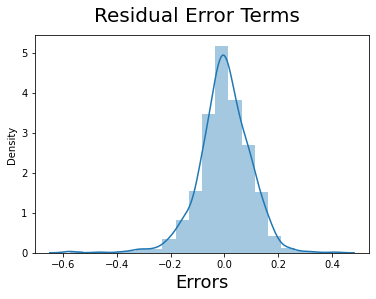

In [104]:
y_LR_Pred = lm.predict(X_train)
res = y_train-y_LR_Pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Residual Error Terms', fontsize = 20)                  
# Plot heading 
plt.xlabel('Errors', fontsize = 18) 

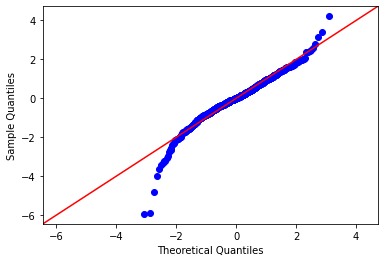

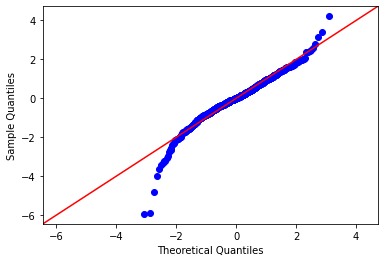

In [105]:
sm.qqplot(res, fit=True,line='45')

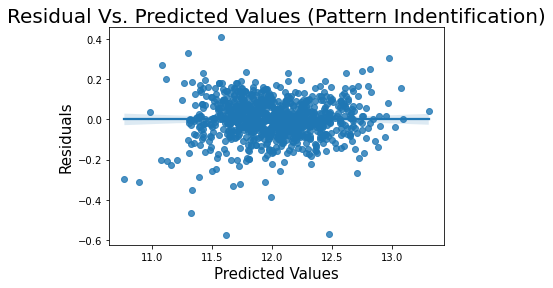

In [106]:
sns.regplot(x=y_LR_Pred, y=res)
plt.title('Residual Vs. Predicted Values (Pattern Indentification)', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()

In [107]:
# Assign the columns selected by RFE to cols

col = X_train.columns[rfe.support_]

# assign the 50 features selected using RFE to a dataframe and view them

rfe_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
rfe_df = rfe_df.loc[rfe_df['rfe_support'] == True]
rfe_df.reset_index(drop=True, inplace=True)

rfe_df

,Variable,rfe_support,rfe_ranking
0,OverallQual,True,1
1,OverallCond,True,1
2,TotalBsmtSF,True,1
3,GrLivArea,True,1
4,GarageCars,True,1
5,MSZoning_FV,True,1
6,MSZoning_RH,True,1
7,MSZoning_RL,True,1
8,MSZoning_RM,True,1
9,LotConfig_FR3,True,1


In [108]:
# Assign the 50 columns to X_train_rfe
X_train_rfe = X_train[col]

In [109]:
# Associate the new 50 columns to X_train and X_test for further analysis
X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

## Model building and Evaluation
### Ridge Regression Model

In [110]:
# list of alphas
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [111]:
# the best hyperparameter alpha
print(ridge_model_cv.best_params_)

{'alpha': 0.4}


In [112]:
{'alpha': 0.3}
#fit the data to ridge
ridge = Ridge(alpha=0.3)
ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 0.09842478  0.05581031  0.0725489   0.13497174  0.05635499  0.33104703
  0.21917031  0.28537138  0.17096705 -0.06137025  0.06229178  0.06479929
  0.07062197 -0.10264362 -0.08280169 -0.06001147 -0.14510909  0.0830912
 -0.15808453 -0.15915575 -0.15051514 -0.12974041 -0.31193759  0.03012973
 -0.046919   -0.05700178  0.0154667  -0.05280372 -0.08708058  0.09690867
 -0.046919    0.08283509  0.07213591  0.04847645  0.08668254 -0.14012161
  0.10515555  0.08651635  0.04634047  0.10734499  0.07249294  0.0622209
  0.04634047  0.06447475 -0.06235318 -0.06379772  0.08211826 -0.11164712
 -0.12575092  0.09712582]


In [113]:
# display the mean scores
ridge_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_results = ridge_results[ridge_results['param_alpha']<=500]
ridge_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
6,0.4,-0.086634,-0.093134,1
5,0.3,-0.086516,-0.093142,2
7,0.5,-0.086749,-0.093144,3
8,0.6,-0.086860,-0.093150,4
9,0.7,-0.086961,-0.093151,5
10,0.8,-0.087055,-0.093153,6
11,0.9,-0.087145,-0.093159,7
12,1.0,-0.087227,-0.093166,8
4,0.2,-0.086394,-0.093208,9
13,2.0,-0.087834,-0.093265,10


In [114]:
#printing R2 , RSS, MSE for test train sets
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2=[]
r2_train_lr = r2_score(y_train,y_pred_train )
print("r2_train:")
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test:")
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train-y_pred_train))
print("RSS_train:")
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS_test:")
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train,y_pred_train)
print("MSE_train:")
print(mse_train_lr)
metric2.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test , y_pred_test)
print("MSE_test:")
print(mse_test_lr)
metric2.append(mse_test_lr)

r2_train:
0.9069224468739172
r2_test:
0.8703371021923795
RSS_train:
12.936674825541047
RSS_test:
8.571444976198954
MSE_train:
0.013336778170660873
MSE_test:
0.020604435038939793


In [115]:
# Even though R2 score test train showing good values but the ridge regression considere so many predictors into count

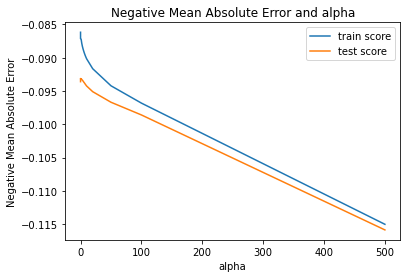

In [116]:
# plotting mean test and train scoes with alpha 

ridge_results['param_alpha'] = ridge_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_results['param_alpha'], ridge_results['mean_train_score'])
plt.plot(ridge_results['param_alpha'], ridge_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [117]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,OverallQual,0.0984
1,OverallCond,0.0558
2,TotalBsmtSF,0.0725
3,GrLivArea,0.1350
4,GarageCars,0.0564
5,MSZoning_FV,0.3310
6,MSZoning_RH,0.2192
7,MSZoning_RL,0.2854
8,MSZoning_RM,0.1710
9,LotConfig_FR3,-0.0614


In [118]:
#getting top 10 parameters from ridge
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = X_train[ridge_df.Features]

ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']
ridge_coef.sort_values(by='Coef',ascending=False).head(10)


,Feaure,Coef
0,OverallQual,11.764118
6,MSZoning_RH,0.331047
8,MSZoning_RM,0.285371
7,MSZoning_RL,0.219170
9,LotConfig_FR3,0.170967
4,GarageCars,0.134972
40,SaleCondition_AdjLand,0.107345
37,SaleType_Con,0.105156
1,OverallCond,0.098425
30,Exterior2nd_CBlock,0.096909


### Lasso Regression

In [120]:
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8953395257047608
0.8657938652571272


In [121]:
lasso = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [122]:
print(lasso_model_cv.best_params_)

{'alpha': 0.0001}


In [123]:
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [124]:
lasso.coef_

array([ 0.1002142 ,  0.05583901,  0.07304238,  0.13391063,  0.05663281,
        0.31741824,  0.19789277,  0.27213168,  0.15465218, -0.00305364,
        0.06032175,  0.05684158,  0.03437417, -0.09763865, -0.08043164,
       -0.05176758, -0.1341315 ,  0.07546187, -0.10973852, -0.08407341,
       -0.10281759, -0.06474393, -0.28909498,  0.03056092, -0.0082772 ,
       -0.        ,  0.        , -0.        , -0.08069551,  0.00339526,
       -0.00266471,  0.02169437,  0.        ,  0.041035  ,  0.08626379,
       -0.08614709,  0.08155291,  0.01491298,  0.0388587 ,  0.0813919 ,
        0.02798886,  0.05903531,  0.05071667,  0.06241611, -0.05884463,
       -0.04658674,  0.07802393, -0.11067969, -0.12042912,  0.08428101])

In [125]:
#printing R@, RSS, MSE values for test and train sets in Lasso
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3=[]
r2_train_lr = r2_score(y_train,y_pred_train )
print("r2_train:")
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test:")
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train-y_pred_train))
print("RSS_train:")
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS_test:")
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train,y_pred_train)
print("MSE_train:")
print(mse_train_lr)
metric3.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test , y_pred_test)
print("MSE_test:")
print(mse_test_lr)
metric3.append(mse_test_lr)

r2_train:
0.9058876613430668
r2_test:
0.8711475628715968
RSS_train:
13.080497728885458
RSS_test:
8.517868978479155
MSE_train:
0.013485049205036554
MSE_test:
0.020475646582882586


In [126]:
cv_result_lsso = pd.DataFrame(lasso_model_cv.cv_results_)
cv_result_lsso['param_alpha'] = cv_result_lsso['param_alpha'].astype('float32')
cv_result_lsso.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005022,0.001811,0.001417,5.114047e-04,0.0001,{'alpha': 0.0001},-0.092091,-0.091705,-0.089316,-0.102283,...,-0.093215,0.004635,1,-0.087095,-0.088280,-0.088087,-0.084637,-0.087696,-0.087159,0.001325
1,0.002388,0.000797,0.001000,3.989506e-07,0.0010,{'alpha': 0.001},-0.091516,-0.095290,-0.094553,-0.103687,...,-0.096148,0.004044,2,-0.092905,-0.092171,-0.091825,-0.088891,-0.092287,-0.091616,0.001406
2,0.002109,0.000216,0.001110,2.192974e-04,0.0100,{'alpha': 0.01},-0.104680,-0.102283,-0.108307,-0.107305,...,-0.104990,0.002475,3,-0.104250,-0.105403,-0.103319,-0.102576,-0.105214,-0.104152,0.001084
3,0.001915,0.000443,0.001301,3.834979e-04,0.1000,{'alpha': 0.1},-0.149410,-0.166984,-0.156827,-0.151586,...,-0.153086,0.008698,4,-0.151508,-0.152816,-0.153597,-0.153485,-0.150536,-0.152388,0.001187
4,0.003233,0.006466,0.000000,0.000000e+00,0.2000,{'alpha': 0.2},-0.213879,-0.254138,-0.231422,-0.227088,...,-0.224774,0.018884,5,-0.221918,-0.223608,-0.226728,-0.224523,-0.223657,-0.224087,0.001567


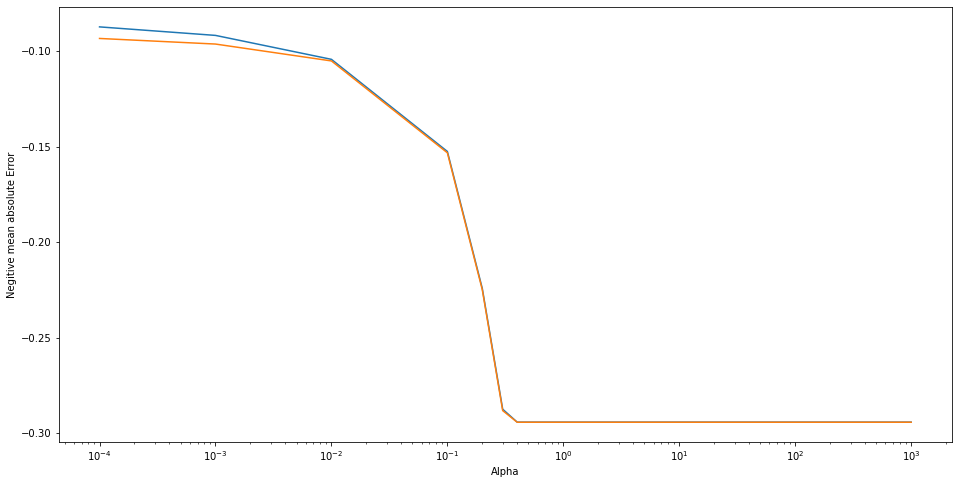

In [127]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_lsso['param_alpha'],cv_result_lsso['mean_train_score'])
plt.plot(cv_result_lsso['param_alpha'],cv_result_lsso['mean_test_score'])
plt.xscale('log')
plt.ylabel('Negitive mean absolute Error')
plt.xlabel('Alpha')
plt.show()

In [128]:
#checking for the alpha 0.001
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8953395257047608
0.8657938652571272


In [129]:
#getting features
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = house_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
0,MSSubClass,11.807891
6,ExterQual,0.142312
4,OverallQual,0.128194
8,BsmtQual,0.123505
1,LotFrontage,0.111364
35,MSZoning_RM,0.086357
3,LotShape,0.075991
5,OverallCond,0.058410
2,LotArea,0.058369
39,LotConfig_CulDSac,0.057860


In [130]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,OverallQual,0.1114
1,OverallCond,0.0584
2,TotalBsmtSF,0.0760
3,GrLivArea,0.1282
4,GarageCars,0.0584
5,MSZoning_FV,0.1423
6,MSZoning_RL,0.1235
7,MSZoning_RM,-0.0005
8,Condition1_Norm,0.0431
9,BldgType_Duplex,-0.0482


In [131]:
# Do an RFE to minimise the features to 15

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [132]:
# Method to get the coefficient values
lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

tempLS_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
tempLS_df = tempLS_df.loc[tempLS_df['rfe_support'] == True]
tempLS_df.reset_index(drop=True, inplace=True)

tempLS_df['Coefficient'] = tempLS_df['Features'].apply(find)
tempLS_df = tempLS_df.sort_values(by=['Coefficient'], ascending=False)
tempLS_df = tempLS_df.head(10)
tempLS_df


,Features,rfe_support,rfe_ranking,Coefficient
3,MSZoning_FV,True,1,0.142312
2,GrLivArea,True,1,0.128194
4,MSZoning_RL,True,1,0.123505
0,OverallQual,True,1,0.111364
8,Foundation_PConc,True,1,0.086357
1,TotalBsmtSF,True,1,0.075991
12,Neighborhood_NridgHt,True,1,0.044930
9,SaleCondition_Normal,True,1,0.042248
7,HouseStyle_SFoyer,True,1,0.012817
10,SaleCondition_Partial,True,1,0.012344


#### Comparing the results of both Ridge and lasso

In [133]:
resultTable = {'Metric':["R2 Score Train", "R2Score Test", "RSS Train", "RSS Test", "MSE Train", "MSE Test"],
              'Ridge regression':metric2}
rg_metric = pd.DataFrame(resultTable, columns=["Metric", 'Ridge regression'])
ls_metric = pd.Series(metric3, name ='Lasso regression')
final = pd.concat([rg_metric,ls_metric],axis=1)
final

,Metric,Ridge regression,Lasso regression
0,R2 Score Train,0.906922,0.905888
1,R2Score Test,0.870337,0.871148
2,RSS Train,12.936675,13.080498
3,RSS Test,8.571445,8.517869
4,MSE Train,0.013337,0.013485
5,MSE Test,0.020604,0.020476


In [134]:
# both ridge and lasso R2 score very similar to each other. but RSS train has noticeable difference.

#### After compairing both the model we can see that the below Features are best explaining the DataSet

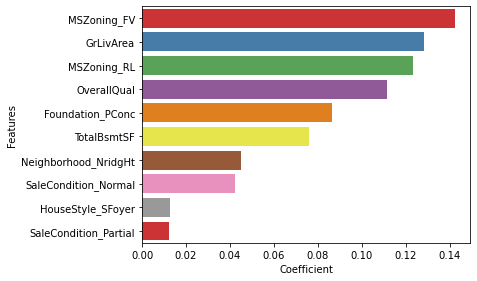

In [135]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = tempLS_df)
plt.show()

### Conclusion :

Significant variables in predicting the price of a house and How well those variables describe the price of a house:

If they concentrating/investing on these varibles well they can notice significant increase in the sales price.
The optimal lambda/alpha value in case of Ridge and Lasso is as below:
Ridge - 0.3
Lasso - 0.0001

The Mean Squared error in case of Ridge and Lasso are:

Ridge - 0.01336662590140295

Lasso - 0.013515001509412367 
The Mean Squared Error of ridge is slightly lower than that of lasso


Also, since Lasso helps in feature reduction (as the coefficient value of one of the feature became 0), Lasso has a better edge over Ridge.
Hence based on Lasso, the factors that generally affect the price are the Zoning classification, Living area square feet, 

Overall quality , condition of the house, Foundation type of the house, Total basement area in square feet,neighbourhood etc

Therefore, the variables predicted by Lasso in the above bar chart as significant variables for predicting the price of a house.

### PART 2 - Subjective Questions

### Question 1
1.What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

Optimal Value of alpha for Ridge

1. Ridge - 0.3
2. Lasso - 0.0001 ##### Double the values of alpha
3. Ridge - 0.6
4. Lasso - 0.0002 Lets analyze the model with these alpha values

In [136]:
# Ridge regression
ridge = Ridge(alpha=0.6)
ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 0.09953354  0.05619525  0.07278613  0.13441889  0.05627912  0.29137694
  0.1774726   0.24827173  0.13289595 -0.05023351  0.0615185   0.06268812
  0.06224036 -0.09935608 -0.08113491 -0.05822534 -0.14280582  0.08082369
 -0.12792776 -0.12003386 -0.12095389 -0.09473805 -0.26225613  0.031477
 -0.04160321 -0.0376924   0.01143726 -0.04215807 -0.08500809  0.07335669
 -0.04160321  0.06271915  0.05740394  0.0463302   0.08707393 -0.11467856
  0.09710922  0.07150643  0.04693881  0.09908806  0.0642639   0.06318014
  0.04693881  0.06379198 -0.06213756 -0.05934919  0.0800697  -0.11101574
 -0.12232067  0.09177435]


In [137]:
#printing the values of R2, RSS, MSE for train and test

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric4=[]
r2_train_lr = r2_score(y_train,y_pred_train )
print("r2_train:")
print(r2_train_lr)
metric4.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test:")
print(r2_test_lr)
metric4.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train-y_pred_train))
print("RSS_train:")
print(rss1_lr)
metric4.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS_test:")
print(rss2_lr)
metric4.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train,y_pred_train)
print("MSE_train:")
print(mse_train_lr)
metric4.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test , y_pred_test)
print("MSE_test:")
print(mse_test_lr)
metric4.append(mse_test_lr)

r2_train:
0.9063878384815918
r2_test:
0.8706105658030794
RSS_train:
13.010979044960635
RSS_test:
8.553367497353891
MSE_train:
0.013413380458722304
MSE_test:
0.020560979560946855


In [138]:
ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,OverallQual,0.0995
1,OverallCond,0.0562
2,TotalBsmtSF,0.0728
3,GrLivArea,0.1344
4,GarageCars,0.0563
5,MSZoning_FV,0.2914
6,MSZoning_RH,0.1775
7,MSZoning_RL,0.2483
8,MSZoning_RM,0.1329
9,LotConfig_FR3,-0.0502


In [139]:
#feature reduction - taking top 10 features from ridge
model_param = list(ridge.coef_)
model_param.insert(0,ridge.intercept_)
cols =  X_train[ridge_df.Features]

ridge_coef = pd.DataFrame(list(zip(cols,model_param)))
ridge_coef.columns = ['Featuere','Coef']
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
0,OverallQual,11.770827
6,MSZoning_RH,0.291377
8,MSZoning_RM,0.248272
7,MSZoning_RL,0.177473
4,GarageCars,0.134419
9,LotConfig_FR3,0.132896
1,OverallCond,0.099534
40,SaleCondition_AdjLand,0.099088
37,SaleType_Con,0.097109
35,Foundation_Wood,0.087074


In [140]:
# Here we have got Zoning, Condition1, Saletype condition, Exterios

In [141]:
# Lasso Regression:

lm = Lasso(alpha=0.002)
lm.fit(X_train,y_train)

#r2 train
y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

#r2 test
y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8879357191712136
0.8605144673838798


In [142]:
# prnitng R2, RSS, MSE of test train when we double the alpha value for Lasso
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric5=[]
r2_train_lr = r2_score(y_train,y_pred_train )
print("r2_train:")
print(r2_train_lr)
metric5.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test:")
print(r2_test_lr)
metric5.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train-y_pred_train))
print("RSS_train:")
print(rss1_lr)
metric5.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS_test:")
print(rss2_lr)
metric5.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train,y_pred_train)
print("MSE_train:")
print(mse_train_lr)
metric5.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test , y_pred_test)
print("MSE_test:")
print(mse_test_lr)
metric5.append(mse_test_lr)

r2_train:
0.8879357191712136
r2_test:
0.8605144673838798
RSS_train:
15.575604557162212
RSS_test:
9.220776243708254
MSE_train:
0.01605732428573424
MSE_test:
0.022165327508914073


In [143]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lm.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,OverallQual,0.1193
1,OverallCond,0.0575
2,TotalBsmtSF,0.0772
3,GrLivArea,0.1236
4,GarageCars,0.0616
5,MSZoning_FV,0.0738
6,MSZoning_RL,0.0851
7,MSZoning_RM,-0.0423
8,Condition1_Norm,0.0378
9,BldgType_Duplex,-0.0150


In [144]:
# Do an RFE to minimise the features to 15

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [145]:
# Method to get the coefficient values
lasso_coeff_dict = dict(pd.Series(lm.coef_, index = X_train_lasso.columns))

# Assign top 10 features to a temp dataframe for further display in the bar plot
df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
df = df.loc[df['rfe_support'] == True]
df.reset_index(drop=True, inplace=True)

df['Coefficient'] = df['Features'].apply(find)
df = df.sort_values(by=['Coefficient'], ascending=False)
df = df.head(10)
df

,Features,rfe_support,rfe_ranking,Coefficient
4,MSZoning_FV,True,1,0.222373
5,MSZoning_RL,True,1,0.183704
2,GrLivArea,True,1,0.129387
0,OverallQual,True,1,0.102871
8,Foundation_PConc,True,1,0.084897
1,TotalBsmtSF,True,1,0.077818
11,Neighborhood_Crawfor,True,1,0.074205
13,Neighborhood_NridgHt,True,1,0.065437
10,SaleCondition_Normal,True,1,0.059463
3,GarageCars,True,1,0.059166


#### Comparing the Ridge and Lasso after double the vlaues of alpha

In [147]:
#Comparing results of Ridge and Lasso

resultTable = {'Metric':["R2 Score Train", "R2Score Test", "RSS Train", "RSS Test", "MSE Train", "MSE Test"],
              'Ridge regression':metric4}
rg_metric = pd.DataFrame(resultTable, columns=["Metric", 'Ridge regression'])
ls_metric = pd.Series(metric5, name ='Lasso regression')
final = pd.concat([rg_metric,ls_metric],axis=1)
final

,Metric,Ridge regression,Lasso regression
0,R2 Score Train,0.906388,0.887936
1,R2Score Test,0.870611,0.860514
2,RSS Train,13.010979,15.575605
3,RSS Test,8.553367,9.220776
4,MSE Train,0.013413,0.016057
5,MSE Test,0.020561,0.022165


Here Lasso given the very close result of R2 score for both test and train. The most important feature after double the value of alpha is

1. MSZoning_FV
2. MSZoning_RL
3. GrLivArea
4. OverallQual
5. TotalBsmtSF
6. Neighborhood_Crawfor
7. Foundation_PConc
8. Neighborhood_NridgHt
9. SaleCondition_Normal
10.GarageCars


### Question 2
You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

Ans: Based on the alpha/Lambda values I have got, Ridge regression does not zero any of the co efficient, Lasso zeroed one or two coefficients in the selected features, Lasso is better option and it also helps in the some of the feature elimination.

### Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [150]:
houseLasso = houseNew
houseLasso = houseLasso.drop(["MSZoning_FV", "GrLivArea", "MSZoning_RL", "OverallQual", "Foundation_PConc"], axis=1)

In [151]:
df_train, df_test = train_test_split(houseLasso, train_size=0.7,test_size = 0.3, random_state=100)
num_col =['MSSubClass','LotArea','OverallCond',           
          'TotalBsmtSF','1stFlrSF','2ndFlrSF',
         'BsmtFullBath','FullBath','HalfBath','BedroomAbvGr',
         'Fireplaces','GarageCars',
          'WoodDeckSF','OpenPorchSF','EnclosedPorch',
        ]

scaler = StandardScaler()
df_train[num_col] = scaler.fit_transform(df_train[num_col])
df_test[num_col] = scaler.transform(df_test[num_col])

In [152]:
X_trainLS = df_train
y_trainLS = df_train.pop('SalePrice')

X_testLS = df_test
y_testLS = df_test.pop('SalePrice')
# linear regression
lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, 50)            
rfe = rfe.fit(X_trainLS, y_trainLS)

In [153]:
# Assign the columns selected by RFE to cols

col = X_trainLS.columns[rfe.support_]

# assign the 50 features selected using RFE to a dataframe and view them

temp1 = pd.DataFrame(list(zip(X_trainLS.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp1 = temp1.loc[temp1['rfe_support'] == True]
temp1.reset_index(drop=True, inplace=True)

temp1

,Variable,rfe_support,rfe_ranking
0,TotalBsmtSF,True,1
1,1stFlrSF,True,1
2,2ndFlrSF,True,1
3,KitchenQual,True,1
4,BldgType_Duplex,True,1
5,HouseStyle_1.5Unf,True,1
6,HouseStyle_1Story,True,1
7,HouseStyle_2.5Fin,True,1
8,RoofStyle_Gable,True,1
9,RoofStyle_Gambrel,True,1


In [154]:
# Assign the 50 columns to X_train_rfe

X_trainLS_rfe = X_trainLS[col]
# Associate the new 50 columns to X_train and X_test for further analysis

X_trainLS = X_trainLS_rfe[X_trainLS_rfe.columns]
X_testLS =  X_testLS[X_trainLS.columns]

#### Perform Lasso to new model after dropping the five imp features

In [155]:
# Lasso Regression:

lm = Lasso(alpha=0.001)
lm.fit(X_trainLS,y_trainLS)

y_train_predLS = lm.predict(X_trainLS)
print(r2_score(y_true=y_trainLS,y_pred=y_train_predLS))

y_test_predLS  = lm.predict(X_testLS)
print(r2_score(y_true=y_testLS,y_pred=y_test_predLS))

0.8508069159169048
0.831327471195756


In [156]:
#printing R2, RSS, MSE results
r2_train_lr = r2_score(y_trainLS ,y_train_predLS )
print(r2_train_lr)


r2_test_lr = r2_score(y_testLS, y_test_predLS)
print(r2_test_lr)


rss1_lr = np.sum(np.square(y_trainLS-y_train_predLS))
print(rss1_lr)


rss2_lr = np.sum(np.square(y_testLS - y_test_predLS))
print(rss2_lr)


mse_train_lr = mean_squared_error(y_trainLS,y_train_predLS)
print(mse_train_lr)


mse_test_lr = mean_squared_error(y_testLS , y_test_predLS)
print(mse_test_lr)

0.8508069159169048
0.831327471195756
20.736067399495816
11.150200435802233
0.021377389071645173
0.026803366432216907


In [157]:
model_param = list(lm.coef_)
model_param.insert(0,lm.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)
#(["MSZoning_FV", "GrLivArea", "MSZoning_RL", "OverallQual", "Foundation_PConc"]

,Featuere,Coef
0,MSSubClass,11.576299
4,OverallCond,0.139090
3,LotShape,0.134275
2,LotArea,0.125079
26,MoSold,0.122311
28,BuiltOrRemodelAge,0.114759
1,LotFrontage,0.085939
36,LotConfig_FR2,0.067728
47,BldgType_2fmCon,0.063315
37,LotConfig_FR3,0.060795


After removing the five most important fetaure that we have got prior "MSZoning_FV", "GrLivArea", "MSZoning_RL", "OverallQual", "Foundation_PConc" I have got the other important fetaures to predict the sales price with Overall condition, Lot area, shape, Condition1, IsRemodeled.